<a href="https://colab.research.google.com/github/RishabKr15/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Bike Sharing Demand Prediction**



## **Project Type**    - **Regression**
## **Contribution**    - **Individual**
## **Name**            - **Rishabh Kumar**


# **Project Summary -**

**Business Context**

Currently, rental bikes are introduced in many urban cities to enhance mobility comfort. Ensuring the availability and accessibility of rental bikes at the right time is crucial, as it reduces waiting time and improves customer experience. Maintaining a stable supply of rental bikes across the city is a major concern, with the key challenge being the accurate prediction of bike demand at different hours.

**Data Exploration**

Initially, we imported the necessary libraries and examined our dataset, which consists of 8,760 rows and 14 columns with no duplicate or missing data. We thoroughly analyzed the features to understand their significance and the data they represent.

**Data Wrangling**

* The 'Date' column was originally in 'object' datatype; we converted it to 'datetime'.

* Extracted 'day_of_week', 'month', and 'year' (as a categorical value) from the 'Date' column, then dropped the original column.

* Renamed columns for convenience

* Converted the 'hour' column to 'object' datatype, treating it as a categorical feature.

**Data Visualization & Analysis**

* Conducted univariate and bivariate analysis concerning the dependent variable.

* Derived insights from various visualizations.

* Plotted the linear relationship between numerical features and the dependent variable.

* Created a correlation heatmap and pairplot for a better understanding of relationships between variables.

**Hypothesis Testing**

Based on visualizations, we formulated three hypothetical statements and performed hypothesis tests:

* The average bike count in Seoul city at any point in time is greater than 100.

* The average temperature in Seoul city at any point is greater than 10°C.

* The standard deviation of humidity in Seoul city is not always 20.

**Feature Engineering**

* Outliers in the 'Wind speed' column were handled using the capping method.

* Dropped the 'Dew point temperature' column due to high correlation with 'Temperature'.

* Transformed the 'Days of week' column to categorize data into 'Weekdays' and 'Weekends' based on demand patterns.

* Applied one-hot encoding to categorical features, dropping the first column to avoid multicollinearity.

* Addressed the right-skewness in the dependent variable ('Rented_bike_count') using a square root transformation.

* Scaled data using MinMax Scaler.

* Split data into training and testing sets in an 80:20 ratio.

**Model Implementation & Evaluation**

We trained multiple machine learning models and evaluated their performance:

* Linear Regression: Adjusted R² score - 76.65% (No hyperparameters to tune).

* Ridge (L2) Regression: Adjusted R² score - 76.65% (Slight improvement with GridSearchCV for hyperparameter tuning).

* Lasso (L1) Regression: Adjusted R² score - 76.65% (Hyperparameter tuning using GridSearchCV).

* Random Forest Regressor: Adjusted R² score - 91% (Best performance with hyperparameter tuning via GridSearchCV).

**Conclusion**

The rental bike company can deploy a machine learning model based on the Random Forest Regressor to accurately predict city bike demand for a given hour. This will enable the company to optimize bike distribution and maintenance schedules. On days or seasons of expected low demand, bikes can be scheduled for maintenance, ensuring operational efficiency.



# **GitHub Link -**

https://github.com/RishabKr15/Bike-Sharing-Demand-Prediction

# **Problem Statement**


**With the rise of urban mobility solutions, rental bikes have become an integral part of city transportation systems. Ensuring their availability at the right time and location is essential to enhance user convenience and reduce waiting times. However, maintaining an optimal supply of rental bikes throughout the city presents a significant challenge. The key issue lies in accurately predicting the number of bikes required at different hours to ensure a stable and efficient rental system.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Numpy and Pandas

import numpy as np
import pandas as pd

#visulaizaton tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

#Libraries for data pre-processing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV


# Libraries for model implementation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

# Libraries for model metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')



### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Bike Sharing Demand Prediction/SeoulBikeData.csv',encoding='unicode_escape')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(len(df[df.duplicated()]))

0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

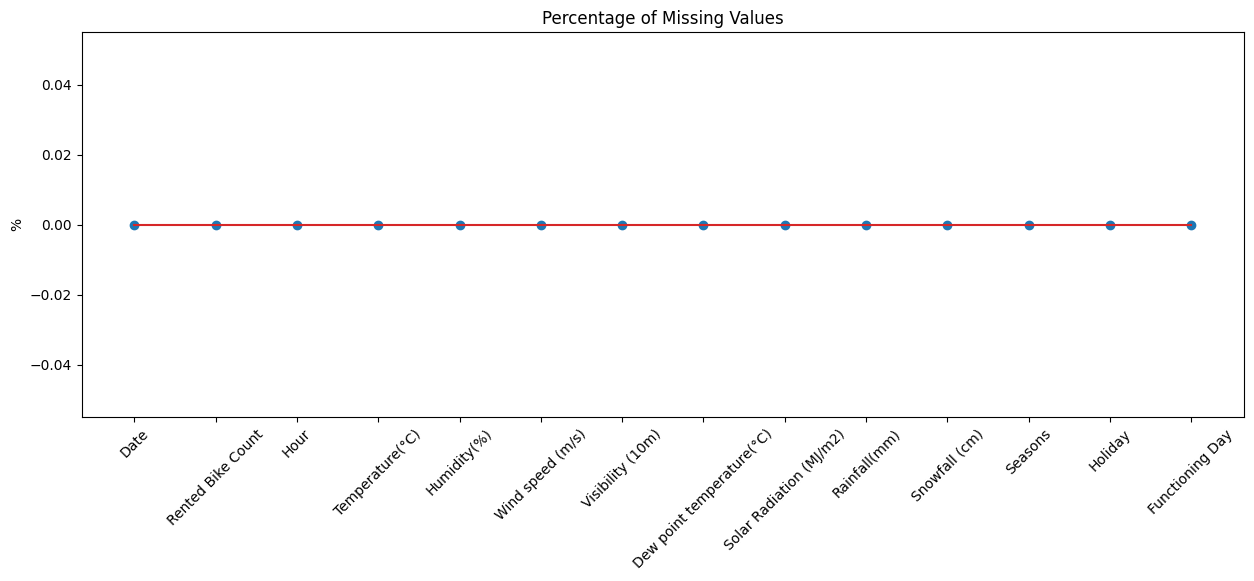

In [9]:
# Visualizing the missing values
missing_values = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index()
plt.figure(figsize=(15,5))
plt.stem(missing_values['index'],missing_values[0])
plt.xticks(rotation=45,fontsize=10)
plt.title('Percentage of Missing Values')
plt.ylabel('%')
plt.show()

### What did you know about your dataset?

* The above dataset provides us the data on number of bikes that were rented in Seoul city by the hour of the day. The corresponding weather data for the hour is also given.

* The dataset contains 8760 entries with 14 features. 4 out of 14 columns have 'object' data type, the rest are numeric.

* There are no missing values/duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description

*   **Date**: Date of the day.
*   **Rented Bike Count**: The number of bikes that were rented.
*   **Hour**: Hour of the day.
*   **Temperature(°C)**: Temperature of the hour in degree Celsius.
*   **Humidity(%)**: Humidity of the hour in %.
*   **Wind speed (m/s)**: Wind speed during the hour in m/s.
*   **Visibility (10m)**: Visibility of 10 metres.
*   **Dew point temperature(°C)**: Dew point temperature in that hour in °C.
*   **Solar Radiation (MJ/m2)**: Solar radidation in MegaJoules / metre2.
*   **Rainfall(mm)**: Rainfall in mellimeter.
*   **Snowfall (cm)**: Snowfall in centimeter.
*   **Seasons**: The current season.
*   **Holiday**: Whether the given day is a holiday.
*   **Functioning Day**: Whether the given day is a Functioning Day.



### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# making dataset analysis ready.

# Copying the dataset for backup
df_copy = df.copy()

# converting date column dtype object to date
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

# spliting day of week, month and year in three column
df['day_of_week'] = df['Date'].dt.day_name() # extracting week name from Date column
df["month"] = df['Date'].dt.month_name() # extracting month name from Date column
df["year"] = df['Date'].map(lambda x: x.year).astype("object") # extracting year from Date column and convert it in object type

# drop the Date column
df.drop(columns=['Date'],inplace=True)

# Renaming columns for convinence
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity',
                      'Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature',
                      'Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall',
                      'Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'})

# convert Hour column integer to Categorical
df['Hour']=df['Hour'].astype('object')

In [14]:
df.head()

Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254    0         -5.2        37         2.2        2000   
1                204    1         -5.5        38         0.8        2000   
2                173    2         -6.0        39         1.0        2000   
3                107    3         -6.2        40         0.9        2000   
4                 78    4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day day_of_week     month  year  
0  No Holiday             Yes      Friday  December  2017  
1  No Holiday             Yes      Friday  December  2017  
2  No Holiday             Yes      Friday  December  2017  
3  No Holiday             Yes      Friday  December  2017  
4  No Holiday             Yes      Friday  December  2017

In [15]:
# Dividing Data in categorical and numerical features
numeric_features = df.select_dtypes(exclude='object')
categorical_features = df.select_dtypes(include='object')

In [16]:
numeric_features.head()

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                254         -5.2        37         2.2        2000   
1                204         -5.5        38         0.8        2000   
2                173         -6.0        39         1.0        2000   
3                107         -6.2        40         0.9        2000   
4                 78         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  
0                  -17.6              0.0       0.0       0.0  
1                  -17.6              0.0       0.0       0.0  
2                  -17.7              0.0       0.0       0.0  
3                  -17.6              0.0       0.0       0.0  
4                  -18.6              0.0       0.0       0.0

In [17]:
categorical_features.head()

Hour Seasons     Holiday Functioning_Day day_of_week     month  year
0    0  Winter  No Holiday             Yes      Friday  December  2017
1    1  Winter  No Holiday             Yes      Friday  December  2017
2    2  Winter  No Holiday             Yes      Friday  December  2017
3    3  Winter  No Holiday             Yes      Friday  December  2017
4    4  Winter  No Holiday             Yes      Friday  December  2017

### What all manipulations have you done and insights you found?

*   First we create a backup dataset under the name 'df_copy'.
*   The column 'Date' is in 'object' datatype, we need to convert it to datetime datatype.
*   From the date column, we extract, 'day_of_week', 'month' & 'year' (year as a categorical value)
*   We drop the date column
*   We rename columns for convinence
*   We convert 'hour' column to 'object' datatype.It should be considered as a categorical value.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###Univariate analysis (Numerical features)

In [18]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('white')

### Chart - 1 Rented_Bike_Count (histplot)

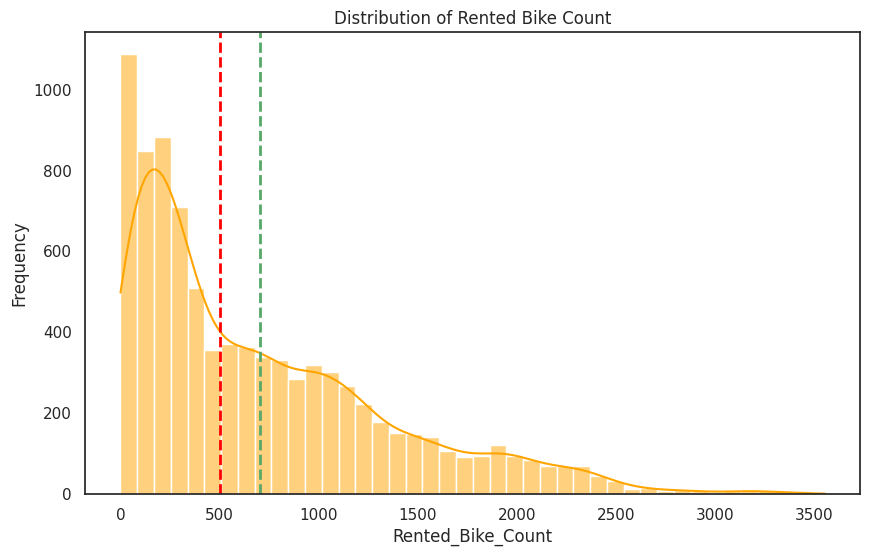

In [19]:
sns.histplot(df['Rented_Bike_Count'],kde=True,color='orange')
plt.axvline(df['Rented_Bike_Count'].mean(),color='g',linestyle='dashed',linewidth=2)
plt.axvline(df['Rented_Bike_Count'].median(),color='red',linestyle='dashed',linewidth=2)
plt.ylabel('Frequency')
plt.title('Distribution of Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

Histogram along with the KDE line lets us visualize the density & the distribution of the feature. The mean & median dashed lines also gives us the level of skewness.

##### 2. What is/are the insight(s) found from the chart?

The data is postively skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As more number of bikes are less than 500, the mass reorganization of the bikes will be easier for the company, thus giving a positive business impact.

#### Chart - 2 Temperature (histplot)

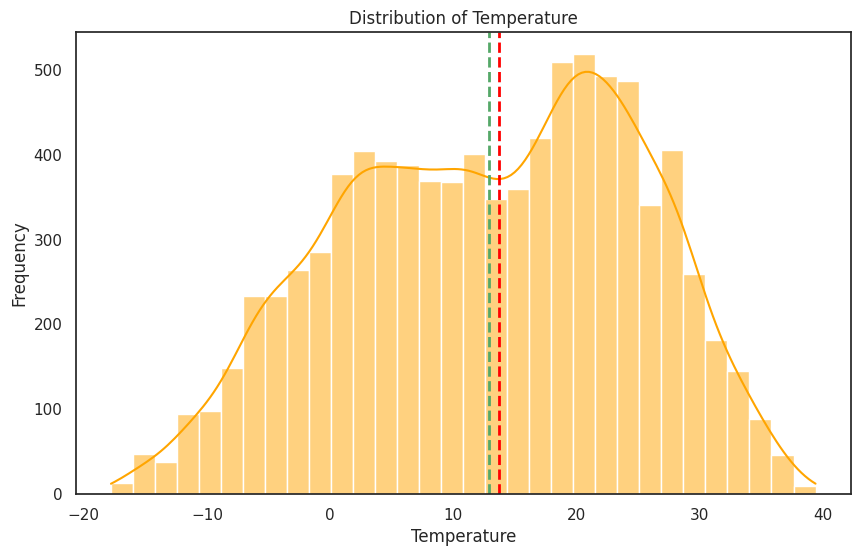

In [20]:
# Chart - 2 visualization code
sns.histplot(df['Temperature'],kde=True,color='orange')
plt.axvline(df['Temperature'].mean(),color='g',linestyle='dashed',linewidth=2)
plt.axvline(df['Temperature'].median(),color='red',linestyle='dashed',linewidth=2)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.title('Distribution of Temperature')
plt.show()

##### 1. Why did you pick the specific chart?

Histogram along with the KDE line lets us visualize the density & the distribution of the feature. The mean & median dashed lines also gives us the level of skewness.

##### 2. What is/are the insight(s) found from the chart?

The temperature distribution follows a bimodal pattern, indicating two dominant climate conditions, likely summer and winter. The mean (green dashed line) is slightly right of the median (red dashed line), suggesting a right-skewed distribution with more extreme high-temperature values. Most temperatures fall between -10°C and 35°C, with peaks around 0°C (winter) and 25°C (summer), highlighting the impact of seasonal variations on temperature trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The bimodal temperature distribution highlights the need for seasonal adjustments in bike availability and pricing. Demand is higher in moderate temperatures, making it beneficial to increase bike availability in spring and autumn while reducing supply during extreme weather to save costs. A dynamic pricing strategy can help maximize revenue by charging higher fares during peak demand and offering discounts in off-peak seasons to retain customers. However, extreme temperatures may reduce demand, impacting revenue, and increasing maintenance costs due to weather-related wear and tear. Proper planning, promotions, and seasonal adjustments can help mitigate these risks while optimizing profitability.

#### Chart - 3 Humidity (histplot)

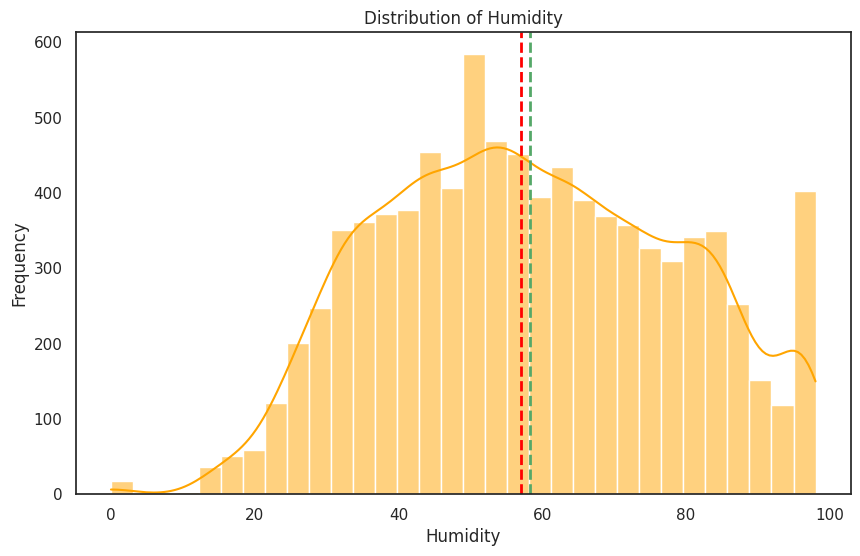

In [21]:
# Chart - 3 visualization code
sns.histplot(df['Humidity'],kde=True,color='orange')
plt.axvline(df['Humidity'].mean(),color='g',linestyle='dashed',linewidth=2)
plt.axvline(df['Humidity'].median(),color='red',linestyle='dashed',linewidth=2)
plt.ylabel('Frequency')
plt.xlabel('Humidity')
plt.title('Distribution of Humidity')
plt.show()

##### 1. Why did you pick the specific chart?

Histogram along with the KDE line lets us visualize the density & the distribution of the feature. The mean & median dashed lines also gives us the level of skewness.

##### 2. What is/are the insight(s) found from the chart?

* The histogram suggests a near-normal distribution of humidity levels.
* The mean and median humidity are close to 56%, indicating a symmetrical distribution with minimal skewness.
* Most observations fall between 40% and 80% humidity, suggesting that extreme humidity levels are rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding humidity trends helps optimize bike availability, ensuring higher ridership during comfortable humidity levels (55-60%) and maximizing revenue. However, extreme humidity (>80% or <30%) may reduce demand, and high moisture levels can increase maintenance costs. By leveraging weather-based strategies, the company can enhance customer satisfaction, minimize operational risks, and drive sustainable business growth.

#### Chart - 4 Wind speed (histplot)

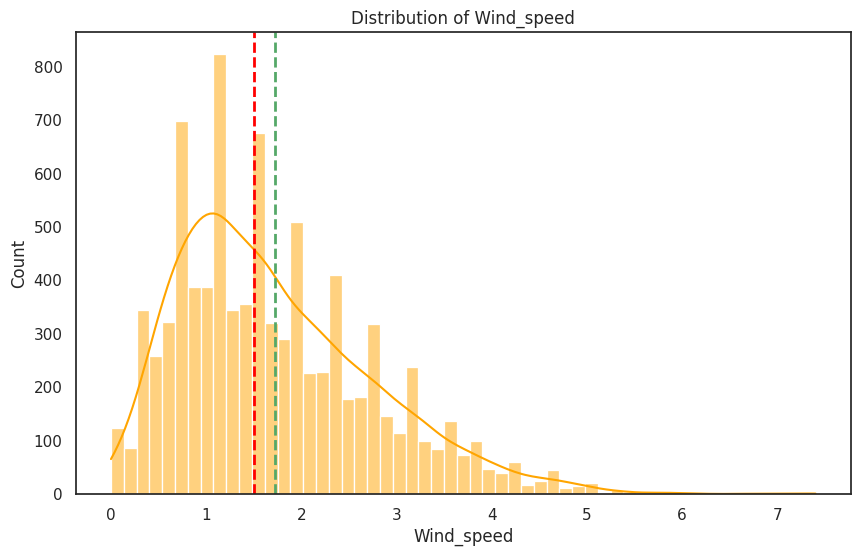

In [22]:
# Chart - 4 visualization code
sns.histplot(df['Wind_speed'],kde=True,color='orange')
plt.axvline(df['Wind_speed'].mean(),color='g',linestyle='dashed',linewidth=2)
plt.axvline(df['Wind_speed'].median(),color='red',linestyle='dashed',linewidth=2)
plt.ylabel('Count')
plt.xlabel('Wind_speed')
plt.title('Distribution of Wind_speed')
plt.show()

##### 1. Why did you pick the specific chart?

Histogram along with the KDE line lets us visualize the density & the distribution of the feature. The mean & median dashed lines also gives us the level of skewness.

##### 2. What is/are the insight(s) found from the chart?

* The wind speed distribution is right-skewed, indicating that most of the recorded wind speeds are low.
*  The average wind speed is around 1.8 m/s, with a higher concentration of data points at lower speeds.
* Higher wind speeds are less frequent but can have a significant impact on bike usage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The analysis of wind speed trends reveals that lower wind speeds are more common, ensuring steady bike rental demand. Businesses can optimize bike availability and introduce safety measures for higher wind speeds. However, strong winds may reduce ridership and increase maintenance costs due to wear and tear. By strategically planning bike availability, implementing wind-based safety advisories, and adjusting maintenance schedules, companies can mitigate risks while maximizing operational efficiency and user satisfaction.

#### Chart - 5

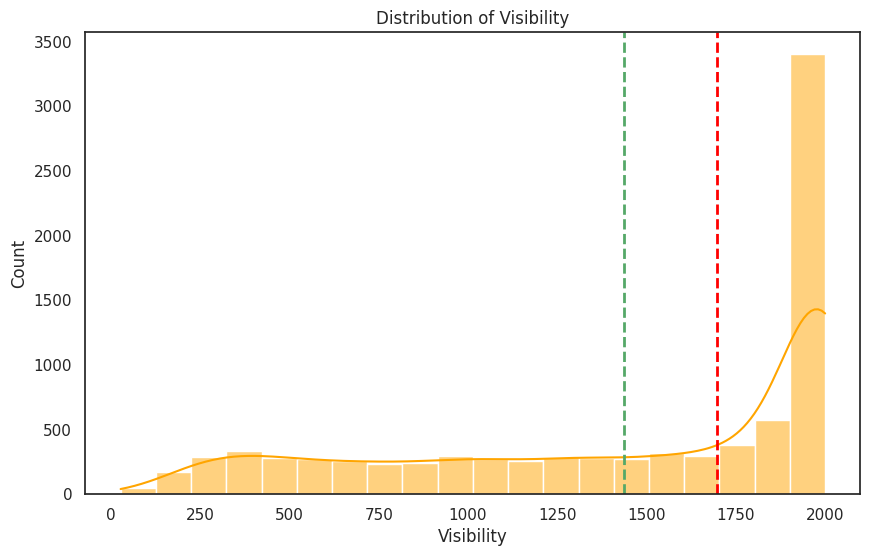

In [23]:
# Chart - 5 visualization code
sns.histplot(df['Visibility'],kde=True,color='orange')
plt.axvline(df['Visibility'].mean(),color='g',linestyle='dashed',linewidth=2)
plt.axvline(df['Visibility'].median(),color='red',linestyle='dashed',linewidth=2)
plt.ylabel('Count')
plt.xlabel('Visibility')
plt.title('Distribution of Visibility')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* The visibility distribution is highly skewed, with most data points concentrated at the higher end (near 2000 meters).
* The mean (green dashed line) and median (red dashed line) indicate that most days have good visibility, with fewer instances of low visibility conditions.
* There are a few occurrences of low visibility, but they are significantly outnumbered by clear visibility conditions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High visibility is predominant, ensuring stable demand, safer riding conditions, and efficient bike allocation. However, low visibility can reduce ridership, pose safety risks, and require operational adjustments. By leveraging visibility trends, businesses can optimize bike availability, implement safety measures, and introduce strategic pricing, ensuring overall positive growth despite occasional demand dips.

#### Chart - 6 Dew point temperature (histplot)

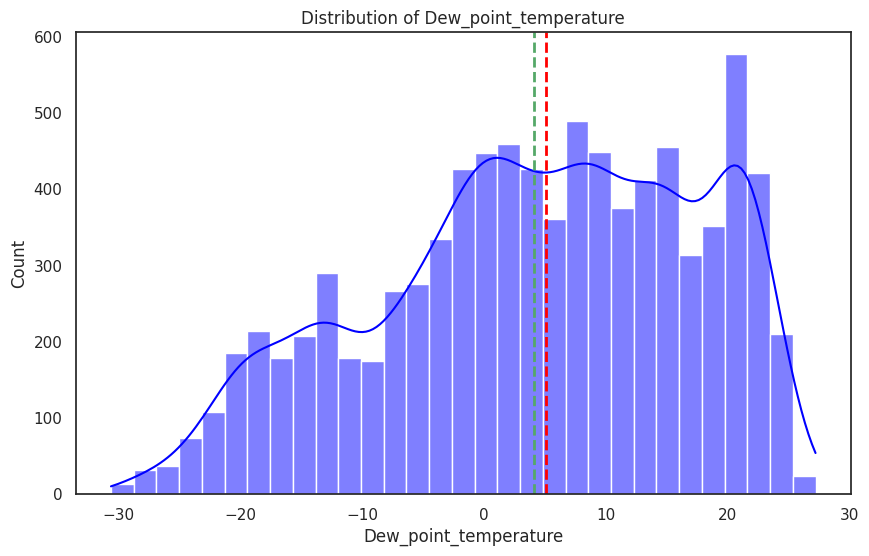

In [24]:
# Chart - 6 visualization code
sns.histplot(df['Dew_point_temperature'],kde=True,color='blue')
plt.axvline(df['Dew_point_temperature'].mean(),color='g',linestyle='dashed',linewidth=2)
plt.axvline(df['Dew_point_temperature'].median(),color='red',linestyle='dashed',linewidth=2)
plt.ylabel('Count')
plt.xlabel('Dew_point_temperature')
plt.title('Distribution of Dew_point_temperature')
plt.show()

##### 1. Why did you pick the specific chart?

The histogram with a KDE (Kernel Density Estimate) plot was chosen because it effectively visualizes the distribution of the "Dew Point Temperature." This chart helps identify key statistical properties such as the shape of the distribution, central tendency (mean, median), and the spread of data.

##### 2. What is/are the insight(s) found from the chart?

* The dew point temperature is not perfectly normally distributed; it appears slightly skewed.
* The range of dew point temperatures spans from around -30 to 25 degrees.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help optimize bike-sharing operations by improving demand forecasting, enabling efficient bike redistribution and maintenance planning, and enhancing user experience through targeted promotions during extreme dew point conditions. This leads to better customer satisfaction and increased revenue.

#### Chart - 7 Solar radiation (histplot)

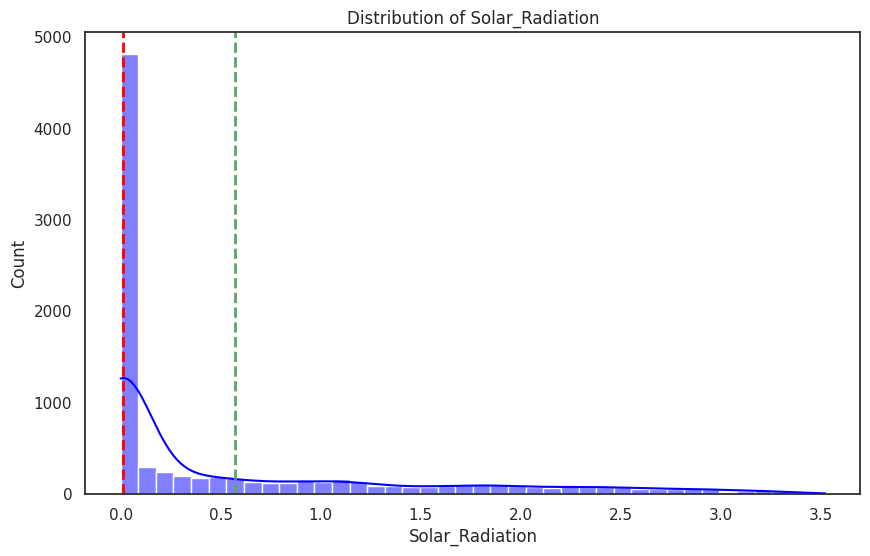

In [25]:
# Chart - 7 visualization code
sns.histplot(df['Solar_Radiation'],kde=True,color='blue')
plt.axvline(df['Solar_Radiation'].mean(),color='g',linestyle='dashed',linewidth=2)
plt.axvline(df['Solar_Radiation'].median(),color='red',linestyle='dashed',linewidth=2)
plt.ylabel('Count')
plt.xlabel('Solar_Radiation')
plt.title('Distribution of Solar_Radiation')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The solar radiation distribution is highly right-skewed, with most values near zero and a long tail toward higher values. The median is much lower than the mean, indicating that a few high values are raising the average. Additionally, low solar radiation dominates, likely due to nighttime, cloudy weather, or seasonal effects.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding solar radiation helps forecast bike demand, optimize bike availability and maintenance, and enable targeted promotions during low sunlight periods. These insights enhance operational efficiency, customer experience, and business growth for bike-sharing services.

#### Chart - 8 Snowfall (histplot)

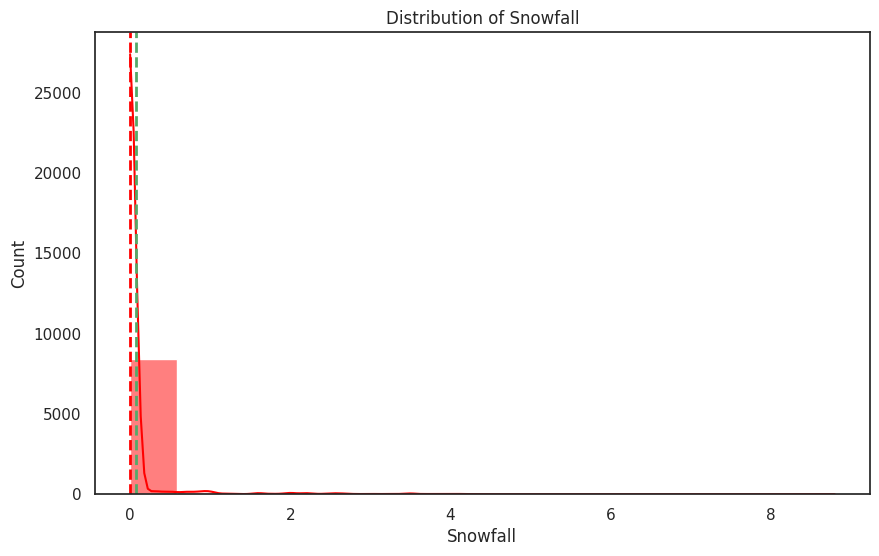

In [26]:
# Chart - 8 visualization code
sns.histplot(df['Snowfall'],kde=True,color='red')
plt.axvline(df['Snowfall'].mean(),color='g',linestyle='dashed',linewidth=2)
plt.axvline(df['Snowfall'].median(),color='red',linestyle='dashed',linewidth=2)
plt.ylabel('Count')
plt.xlabel('Snowfall')
plt.title('Distribution of Snowfall')
plt.show()

##### 1. Why did you pick the specific chart?

Histogram along with the KDE line lets us visualize the density & the distribution of the feature. The mean & median dashed lines also gives us the level of skewness.

##### 2. What is/are the insight(s) found from the chart?

* As the mean & median is close to 0, most days there's no snowfall.
* The histogram shows that snowfall is not common, but when it does occur, it has a significant impact.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Incorporating snowfall data enhances demand forecasting, allowing companies to adjust bike availability and maintenance efficiently. Additionally, providing alerts or discounts during snowfall improves customer safety and satisfaction, leading to better service and engagement.

#### Univariate analysis (Categorical features)

#### Chart - 9 Seasons (piechart)

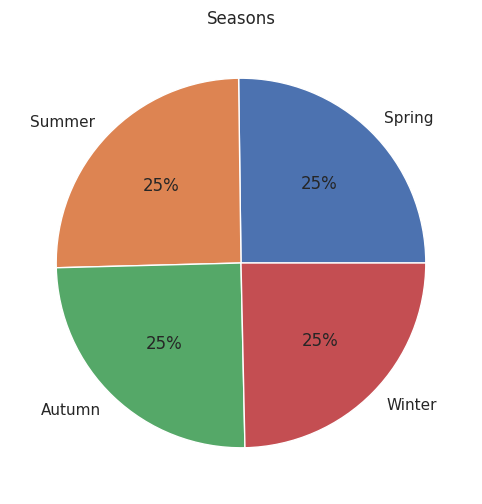

In [27]:
# Chart - 9 visualization code
plt.pie(df['Seasons'].value_counts(),labels=df['Seasons'].value_counts().keys().tolist(),autopct='%.0f%%')
plt.title('Seasons')
plt.show()

##### 1. Why did you pick the specific chart?

* Pie charts are one of the best ways for univariate analysis of categorical data.
* A pie chart effectively represents the distribution of bike-sharing data across different seasons. It provides a clear visual comparison of seasonal variations in ridership.

##### 2. What is/are the insight(s) found from the chart?

* Equal Seasonal Distribution: The dataset is balanced, with each season contributing 25%.
* Minimal Seasonal Impact: Seasonal changes may not significantly affect bike demand, or the data is evenly sampled.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,
* Balanced seasonal demand allows consistent bike availability throughout the year.
* Instead of seasonal discounts, businesses can focus on weather-based or event-driven promotions.

#### Chart - 10  Holiday (piechart)

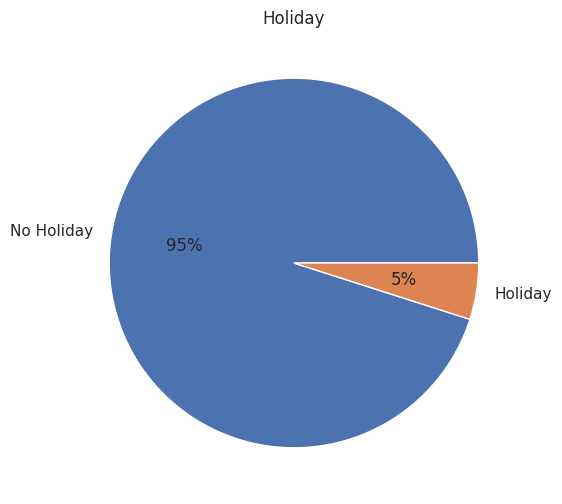

In [28]:
# Chart - 10 visualization code
plt.pie(df['Holiday'].value_counts(),labels=df['Holiday'].value_counts().keys().tolist(),autopct='%.0f%%')
plt.title('Holiday')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are one of the best ways for univariate analysis of categorical data.

##### 2. What is/are the insight(s) found from the chart?

* Most of the data we have is on a 'no holiday' day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Many people ride thier bikes to work/school, thus this feature may have positive impact on the business.

#### Chart - 11 Functioning day (piechart)

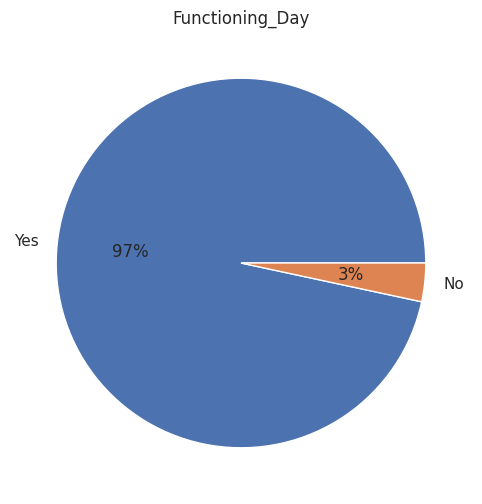

In [29]:
# Chart - 11 visualization code
plt.pie(df['Functioning_Day'].value_counts(),labels = df['Functioning_Day'].value_counts().keys().tolist(),autopct='%.0f%%')
plt.title('Functioning_Day')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are one of the best ways for univariate analysis of categorical data

##### 2. What is/are the insight(s) found from the chart?

Most of the data we have is on a 'functioning' day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we have more data on a functioning day, it lets us dig deep into the insights we can get from the hour of the day.

## Bivariate analysis

#### Chart - 12 Rented Bike Count VS Seasons

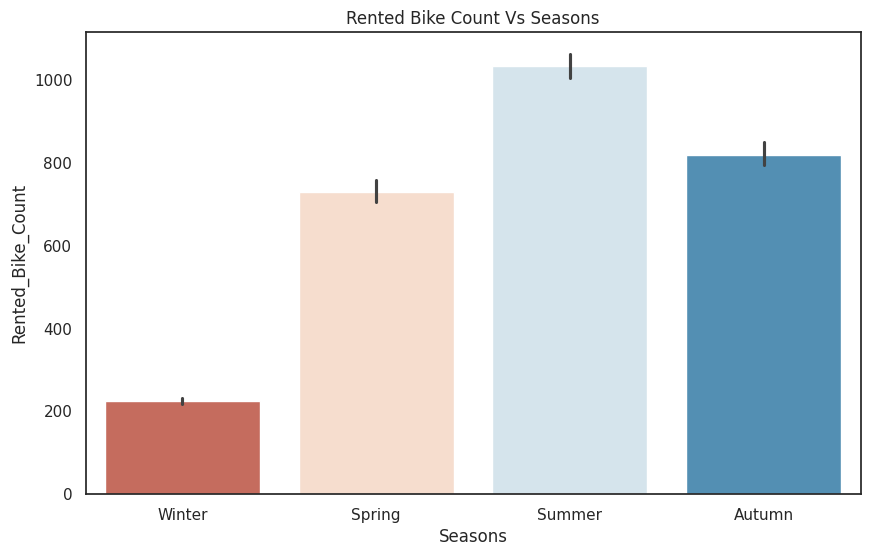

In [30]:
# Chart - 12 visualization code
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count',palette='RdBu')
plt.title('Rented Bike Count Vs Seasons')
plt.show()

##### 1. Why did you pick the specific chart?

A barplot is an effective way to establish relationship between a numerical feature and a categorical feature.

##### 2. What is/are the insight(s) found from the chart?

* The bike ridership is significantly less in winter compared to the other 3 seasons.
* The bike ridership has most numbers in summer season.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The company needs more bike circulated in summer, autumn & spring & while in winter, they can schedule maintainance.

#### Chart - 13 Rented Bike Count Vs Month

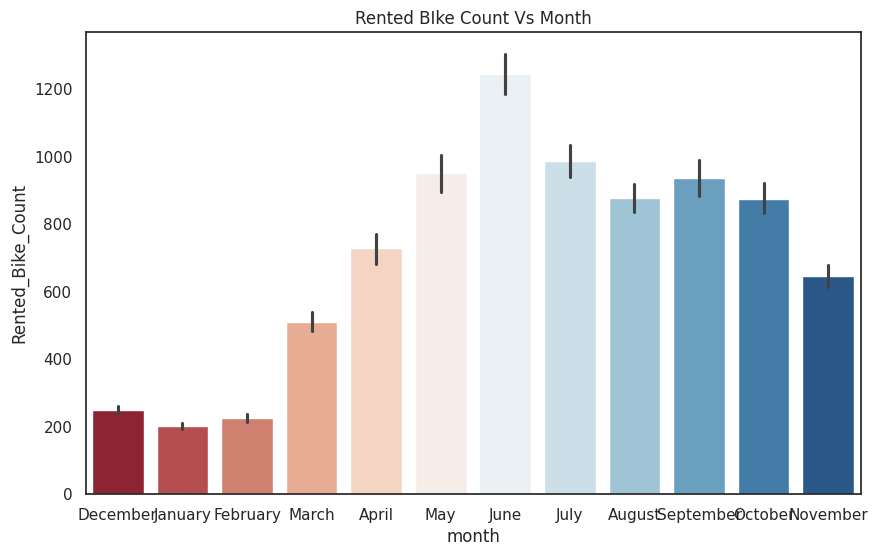

In [31]:
# Chart - 13 visualization code
sns.barplot(data=df,x='month',y='Rented_Bike_Count',palette='RdBu')
plt.title('Rented BIke Count Vs Month')
plt.show()

##### 1. Why did you pick the specific chart?

A barplot is an effective way to establish relationship between a numerical feature and a categorical feature.

##### 2. What is/are the insight(s) found from the chart?

* The barplot shows that in the month of summer like in April, May, June, July. There is hike in rented bike count.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,
The company needs more bike circulated in summer, autumn & spring & while in winter, they can schedule maintainance.

#### Chart - 14 - Rented Bike Count Vs Hour

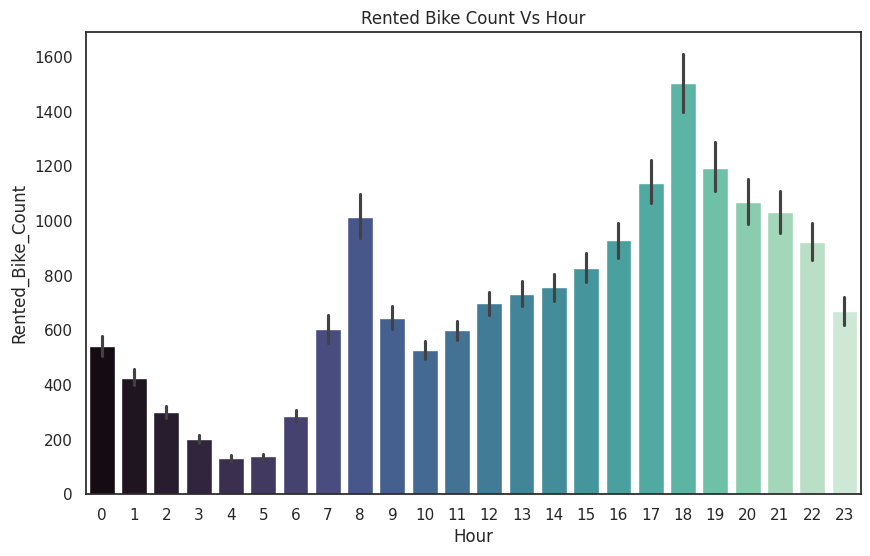

In [32]:
# visualization code
sns.barplot(data=df,x='Hour',y='Rented_Bike_Count',palette='mako')
plt.title('Rented Bike Count Vs Hour')
plt.show()

##### 1. Why did you pick the specific chart?

A barplot is an effective way to establish relationship between a numerical feature and a categorical feature.

##### 2. What is/are the insight(s) found from the chart?

The ridership sees demand in the rush hours & does'nt suddenly drop but see steady demand till 12:00 am.

3. Will the gained insights help creating a positive business impact?

The bike movers can be prepared in advance to meet the requirements for the rush hour.

#### Chart - 15 Rented Bike Count VS Day of Week

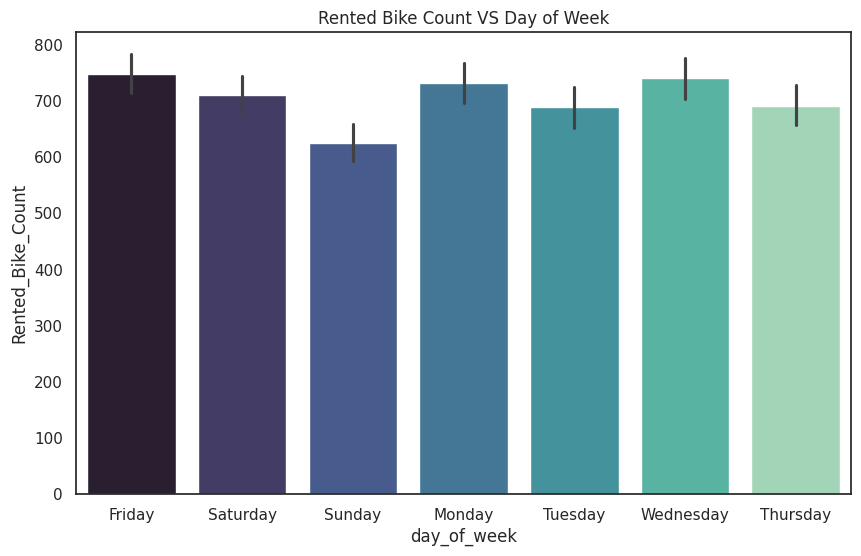

In [33]:
# visualization code
sns.barplot(data=df,x='day_of_week',y='Rented_Bike_Count',palette='mako')
plt.title('Rented Bike Count VS Day of Week')
plt.show()

##### 1. Why did you pick the specific chart?

A barplot is an effective way to establish relationship between a numerical feature and a categorical feature.

##### 2. What is/are the insight(s) found from the chart?

There's slight less demand for the bikes on sunday & tuesday.

3. Will the gained insights help creating a positive business impact?

No

### Chart - 16 Rented Bike Count VS Holiday

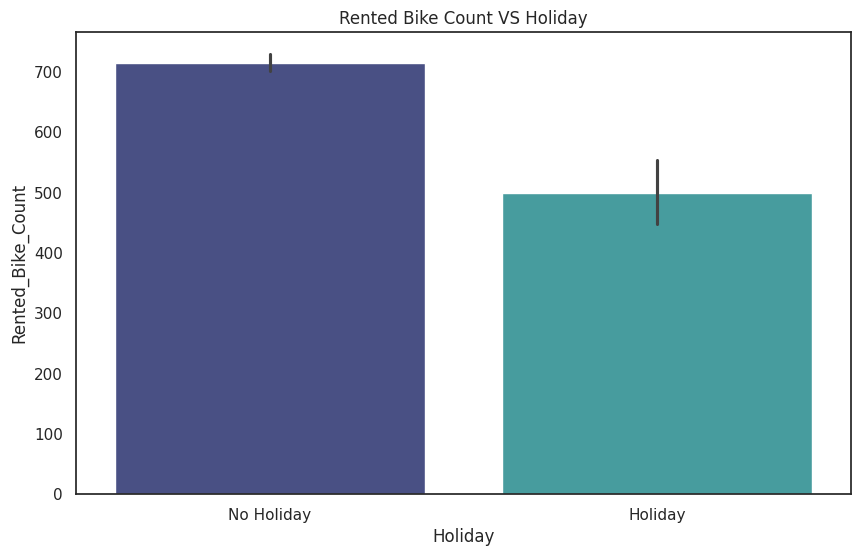

In [34]:
# visualization code
sns.barplot(data=df,x='Holiday',y='Rented_Bike_Count',palette='mako')
plt.title('Rented Bike Count VS Holiday')
plt.show()

1. Why did you pick the specific chart?


* A barplot is an effective way to establish relationship between a numerical feature and a categorical feature.

2. What is/are the insight(s) found from the chart?

There's reduced demand for the bikes on a holiday.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This suggests the many people who go to work/school use this bikes in majority.

### Chart - 17 Rented Bike Count VS Temperature

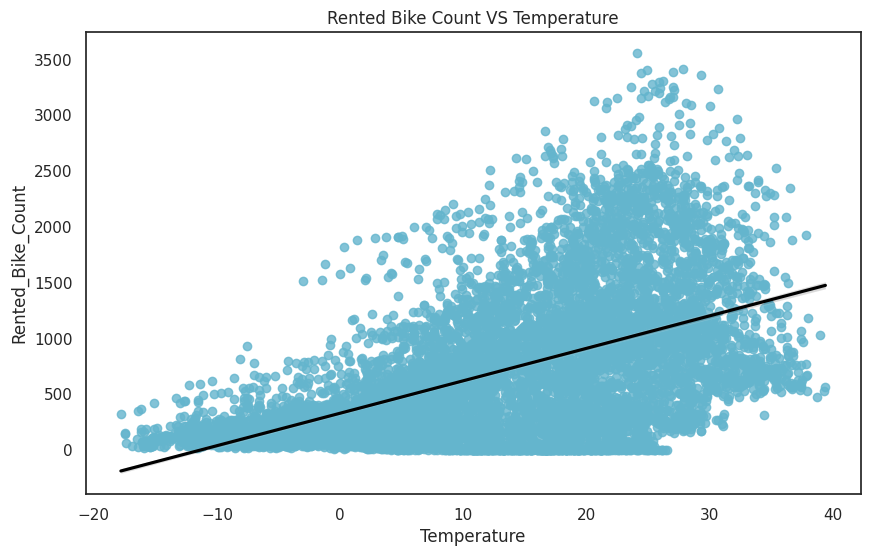

In [35]:
sns.regplot(x='Temperature',y='Rented_Bike_Count',data=df,scatter_kws={"color": 'c'}, line_kws={"color": "black"})
plt.title('Rented Bike Count VS Temperature')
plt.show()

1. Why did you pick the specific chart?

Scatterplot is one of the most effective way to establish relationship between numerical & numerical data.

2. What is/are the insight(s) found from the chart?

Temperature is positively related with Rented_Bike_Count.



3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Hence more the temperature, better ridership.

#### **Chart - 18 Rented Bike Count VS Humidity**


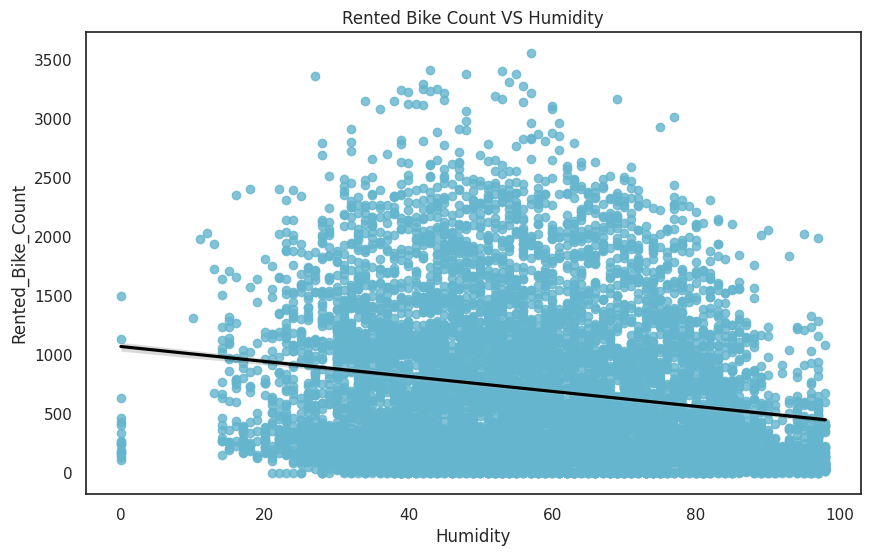

In [36]:
# Chart - 18 visualization code

sns.regplot(x=df['Humidity'],y=df['Rented_Bike_Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})
plt.title('Rented Bike Count VS Humidity')
plt.show()


1. Why did you pick the specific chart?

Scatterplot is one of the most effective way to establish relationship between numerical & numerical data.

2. What is/are the insight(s) found from the chart?

Humidity is negatively related with Rented_Bike_Count.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Hence more the humidity, lesser the ridership.

#### **Chart - 19 Rented Bike Count VS Wind Speed**

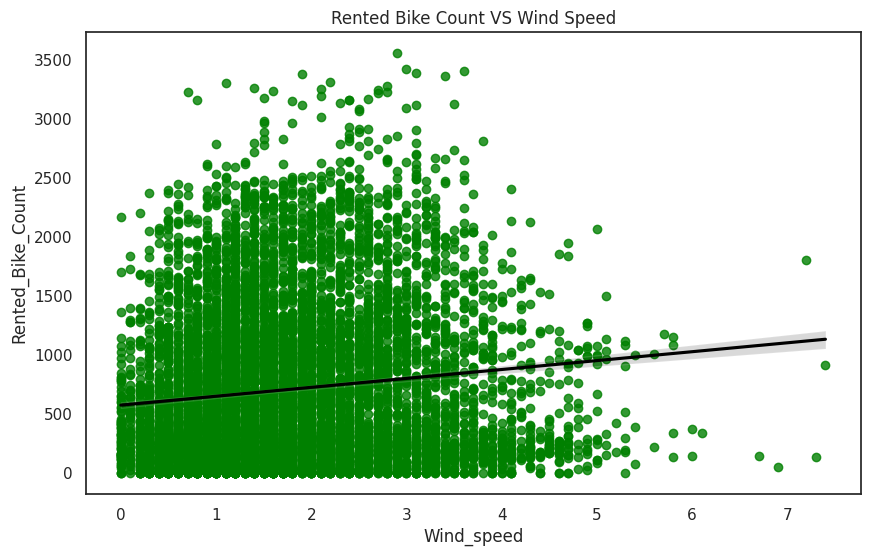

In [37]:
sns.regplot(x=df['Wind_speed'],y=df['Rented_Bike_Count'],scatter_kws={"color": 'Green'}, line_kws={"color": "black"})
plt.title('Rented Bike Count VS Wind Speed')
plt.show()

1. Why did you pick the specific chart?

Scatterplot is one of the most effective way to establish relationship between numerical & numerical data.



2. What is/are the insight(s) found from the chart?

wind speed is positively related with Rented_Bike_Count.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Hence more the wind speed, better ridership.



#### **Chart - 20 Rented Bike Count VS Visibility**


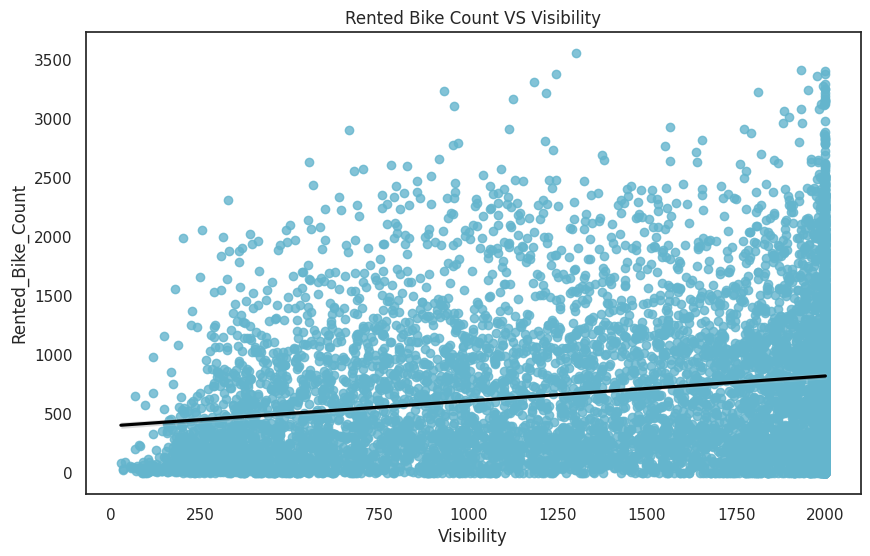

In [38]:
# Chart - 20 visualization code

sns.regplot(x=df['Visibility'],y=df['Rented_Bike_Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})
plt.title('Rented Bike Count VS Visibility')
plt.show()

1. Why did you pick the specific chart?

Scatterplot is one of the most effective way to establish relationship between numerical & numerical data.

2. What is/are the insight(s) found from the chart?

Visibility is positively related with Rented_Bike_Count.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Hence more the visibility, better ridership.

#### **Chart - 21 Rented_Bike_Count VS Solar Radiation**

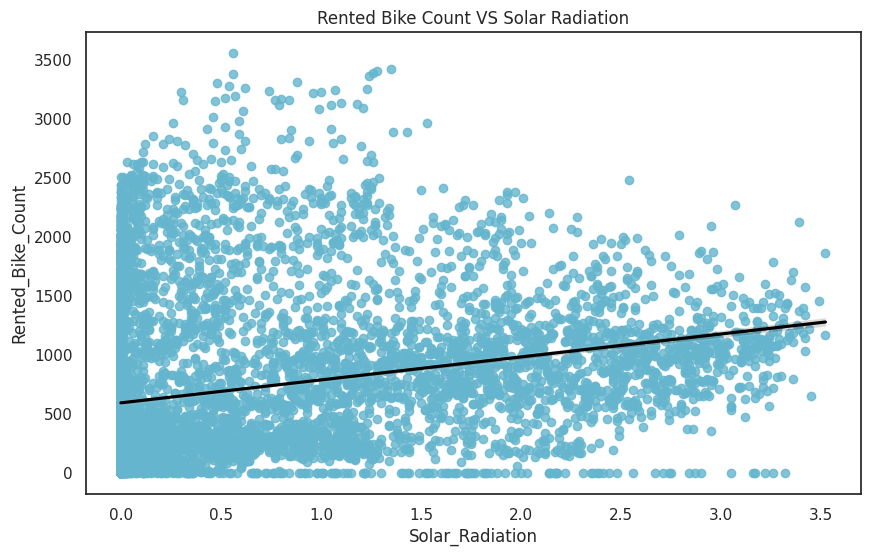

In [39]:
# Chart - 21 visualization code

sns.regplot(x=df['Solar_Radiation'],y=df['Rented_Bike_Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})
plt.title('Rented Bike Count VS Solar Radiation')
plt.show()

1. Why did you pick the specific chart?

Scatterplot is one of the most effective way to establish relationship between numerical & numerical data.

2. What is/are the insight(s) found from the chart?

Solar radiation is positively related with Rented_Bike_Count.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Hence more the solar radiation, better ridership.

#### Chart - 22 Rented_Bike_Count VS Dew Point Temperature

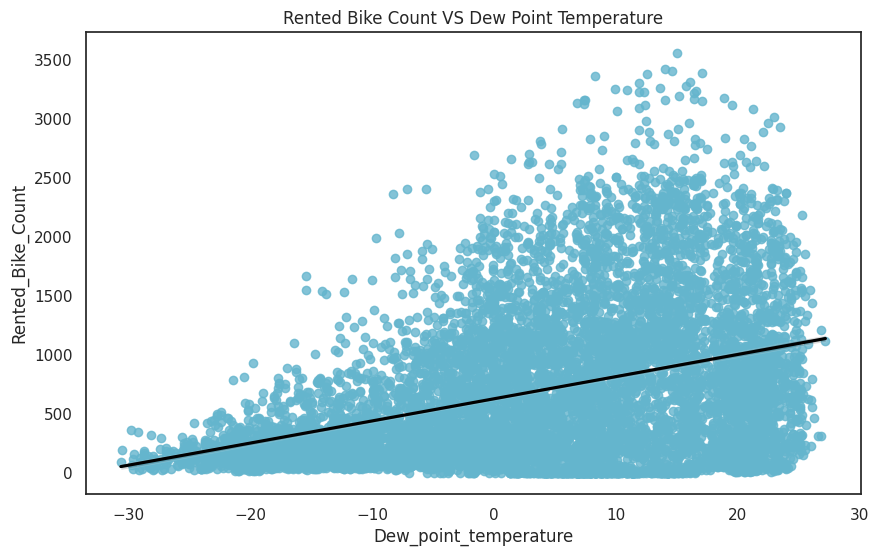

In [40]:
sns.regplot(x='Dew_point_temperature',y='Rented_Bike_Count',data=df,scatter_kws={"color": 'c'}, line_kws={"color": "black"})
plt.title('Rented Bike Count VS Dew Point Temperature')
plt.show()

1. Why did you pick the specific chart?

Scatterplot is one of the most effective way to establish relationship between numerical & numerical data.

2. What is/are the insight(s) found from the chart?

Dew point temperature is positively related with Rented_Bike_Count.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Hence more the dew point temperature, better ridership.

#### Chart - 23 Rented_Bike_Count vs Rainfall

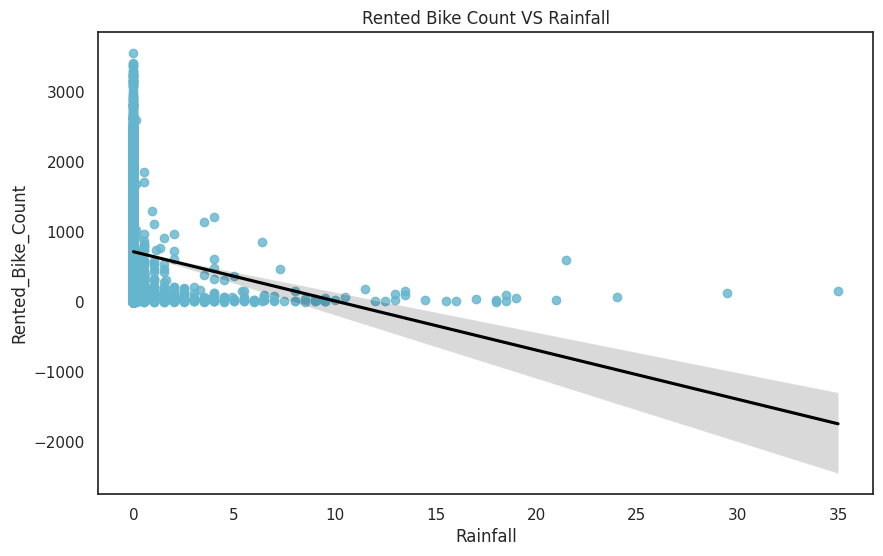

In [41]:
sns.regplot(x='Rainfall',y='Rented_Bike_Count',data=df,scatter_kws={"color": 'c'}, line_kws={"color": "black"})
plt.title('Rented Bike Count VS Rainfall')
plt.show()

1. Why did you pick the specific chart?

Scatterplot is one of the most effective way to establish relationship between numerical & numerical data.

2. What is/are the insight(s) found from the chart?

Rainfall is negatively related with Rented_Bike_Count.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Hence more the rainfall, lesser the ridership.

#### Chart - 24 Rented_Bike_Count vs Snowfall

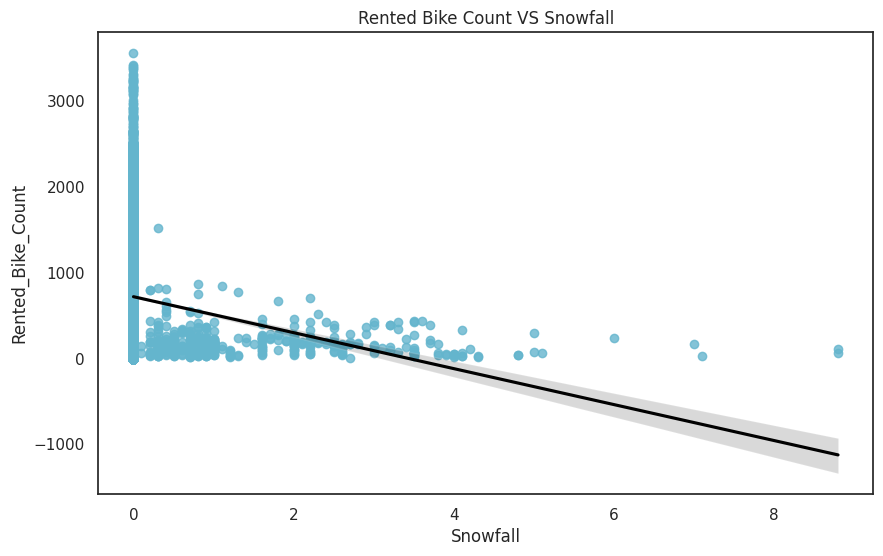

In [42]:
sns.regplot(x='Snowfall',y='Rented_Bike_Count',data=df,scatter_kws={"color": 'c'}, line_kws={"color": "black"})
plt.title('Rented Bike Count VS Snowfall')
plt.show()

1. Why did you pick the specific chart?

Scatterplot is one of the most effective way to establish relationship between numerical & numerical data.

2. What is/are the insight(s) found from the chart?

Snowfall is negatively related with Rented_Bike_Count.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Hence more the snowfall, lesser the ridership.



#### **Chart - 25 - Correlation Heatmap**

In [43]:
dfc = df.drop(['Seasons','Holiday','Functioning_Day','day_of_week','month'],axis=1) #droping some string type columns to get heatmap

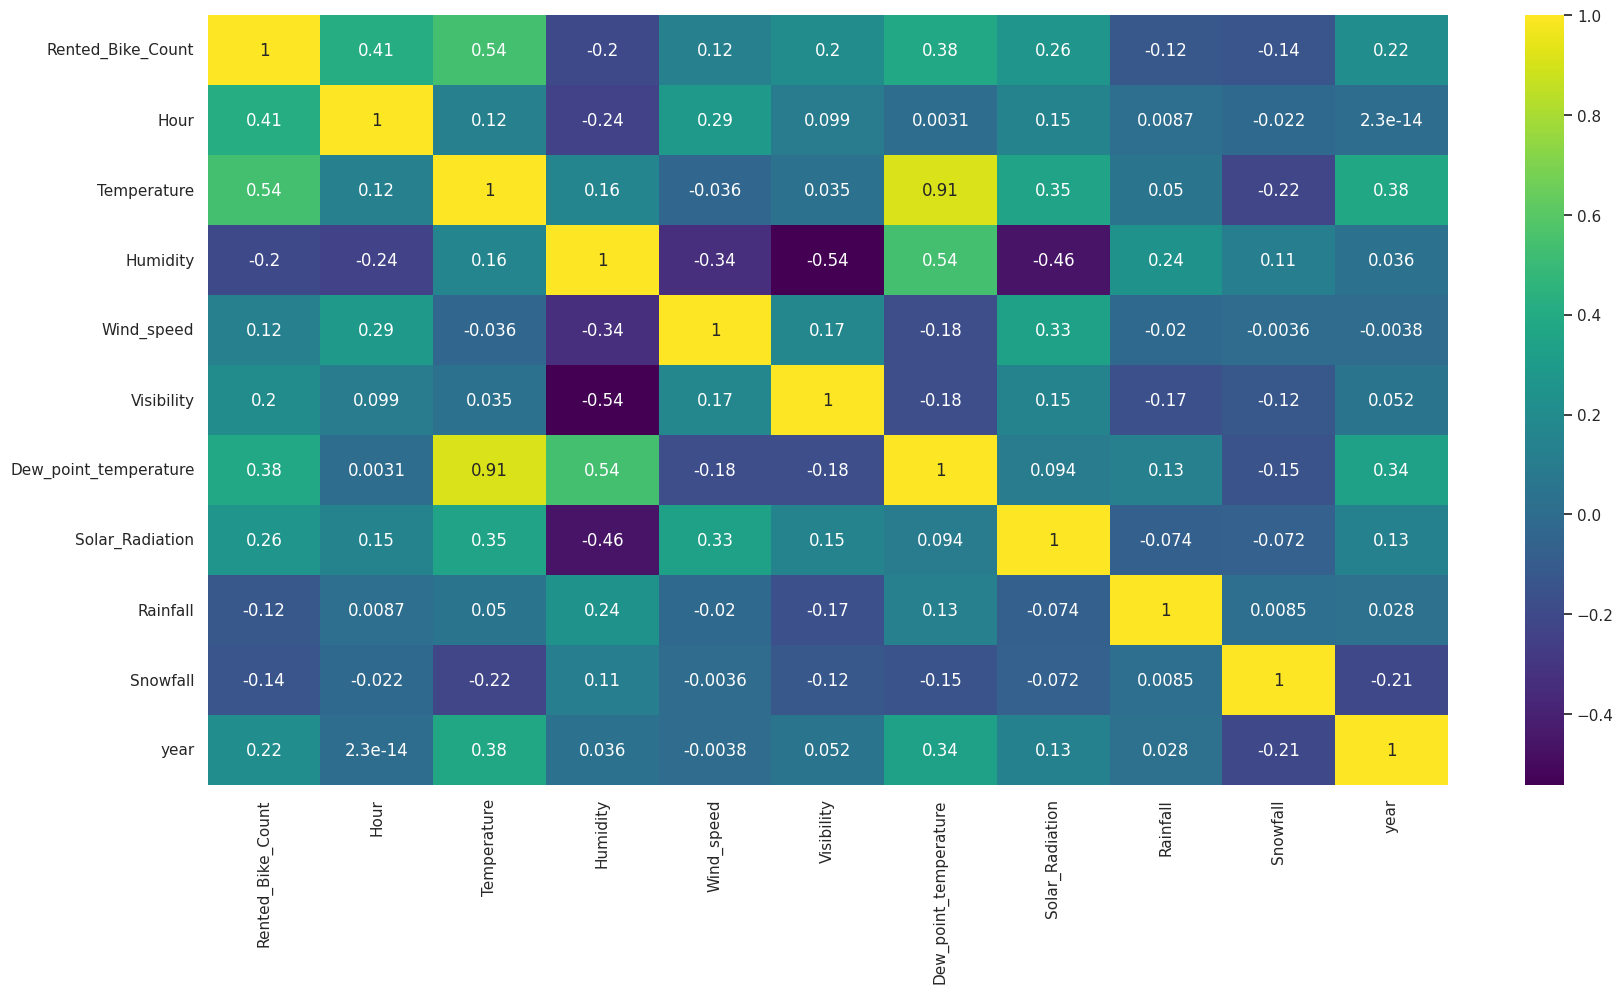

In [44]:
# Chart - 25 Correlation Heatmap visualization code

plt.figure(figsize=(20,10))
sns.heatmap(dfc.corr(),annot=True,cmap="viridis")
plt.show()

1. Why did you pick the specific chart?

Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

2. What is/are the insight(s) found from the chart?

* Humidity has low correlation with visibility due to solar radiation.
* Dew point temperature and temperature are highly related.


#### **Chart - 26 - Pair Plot**

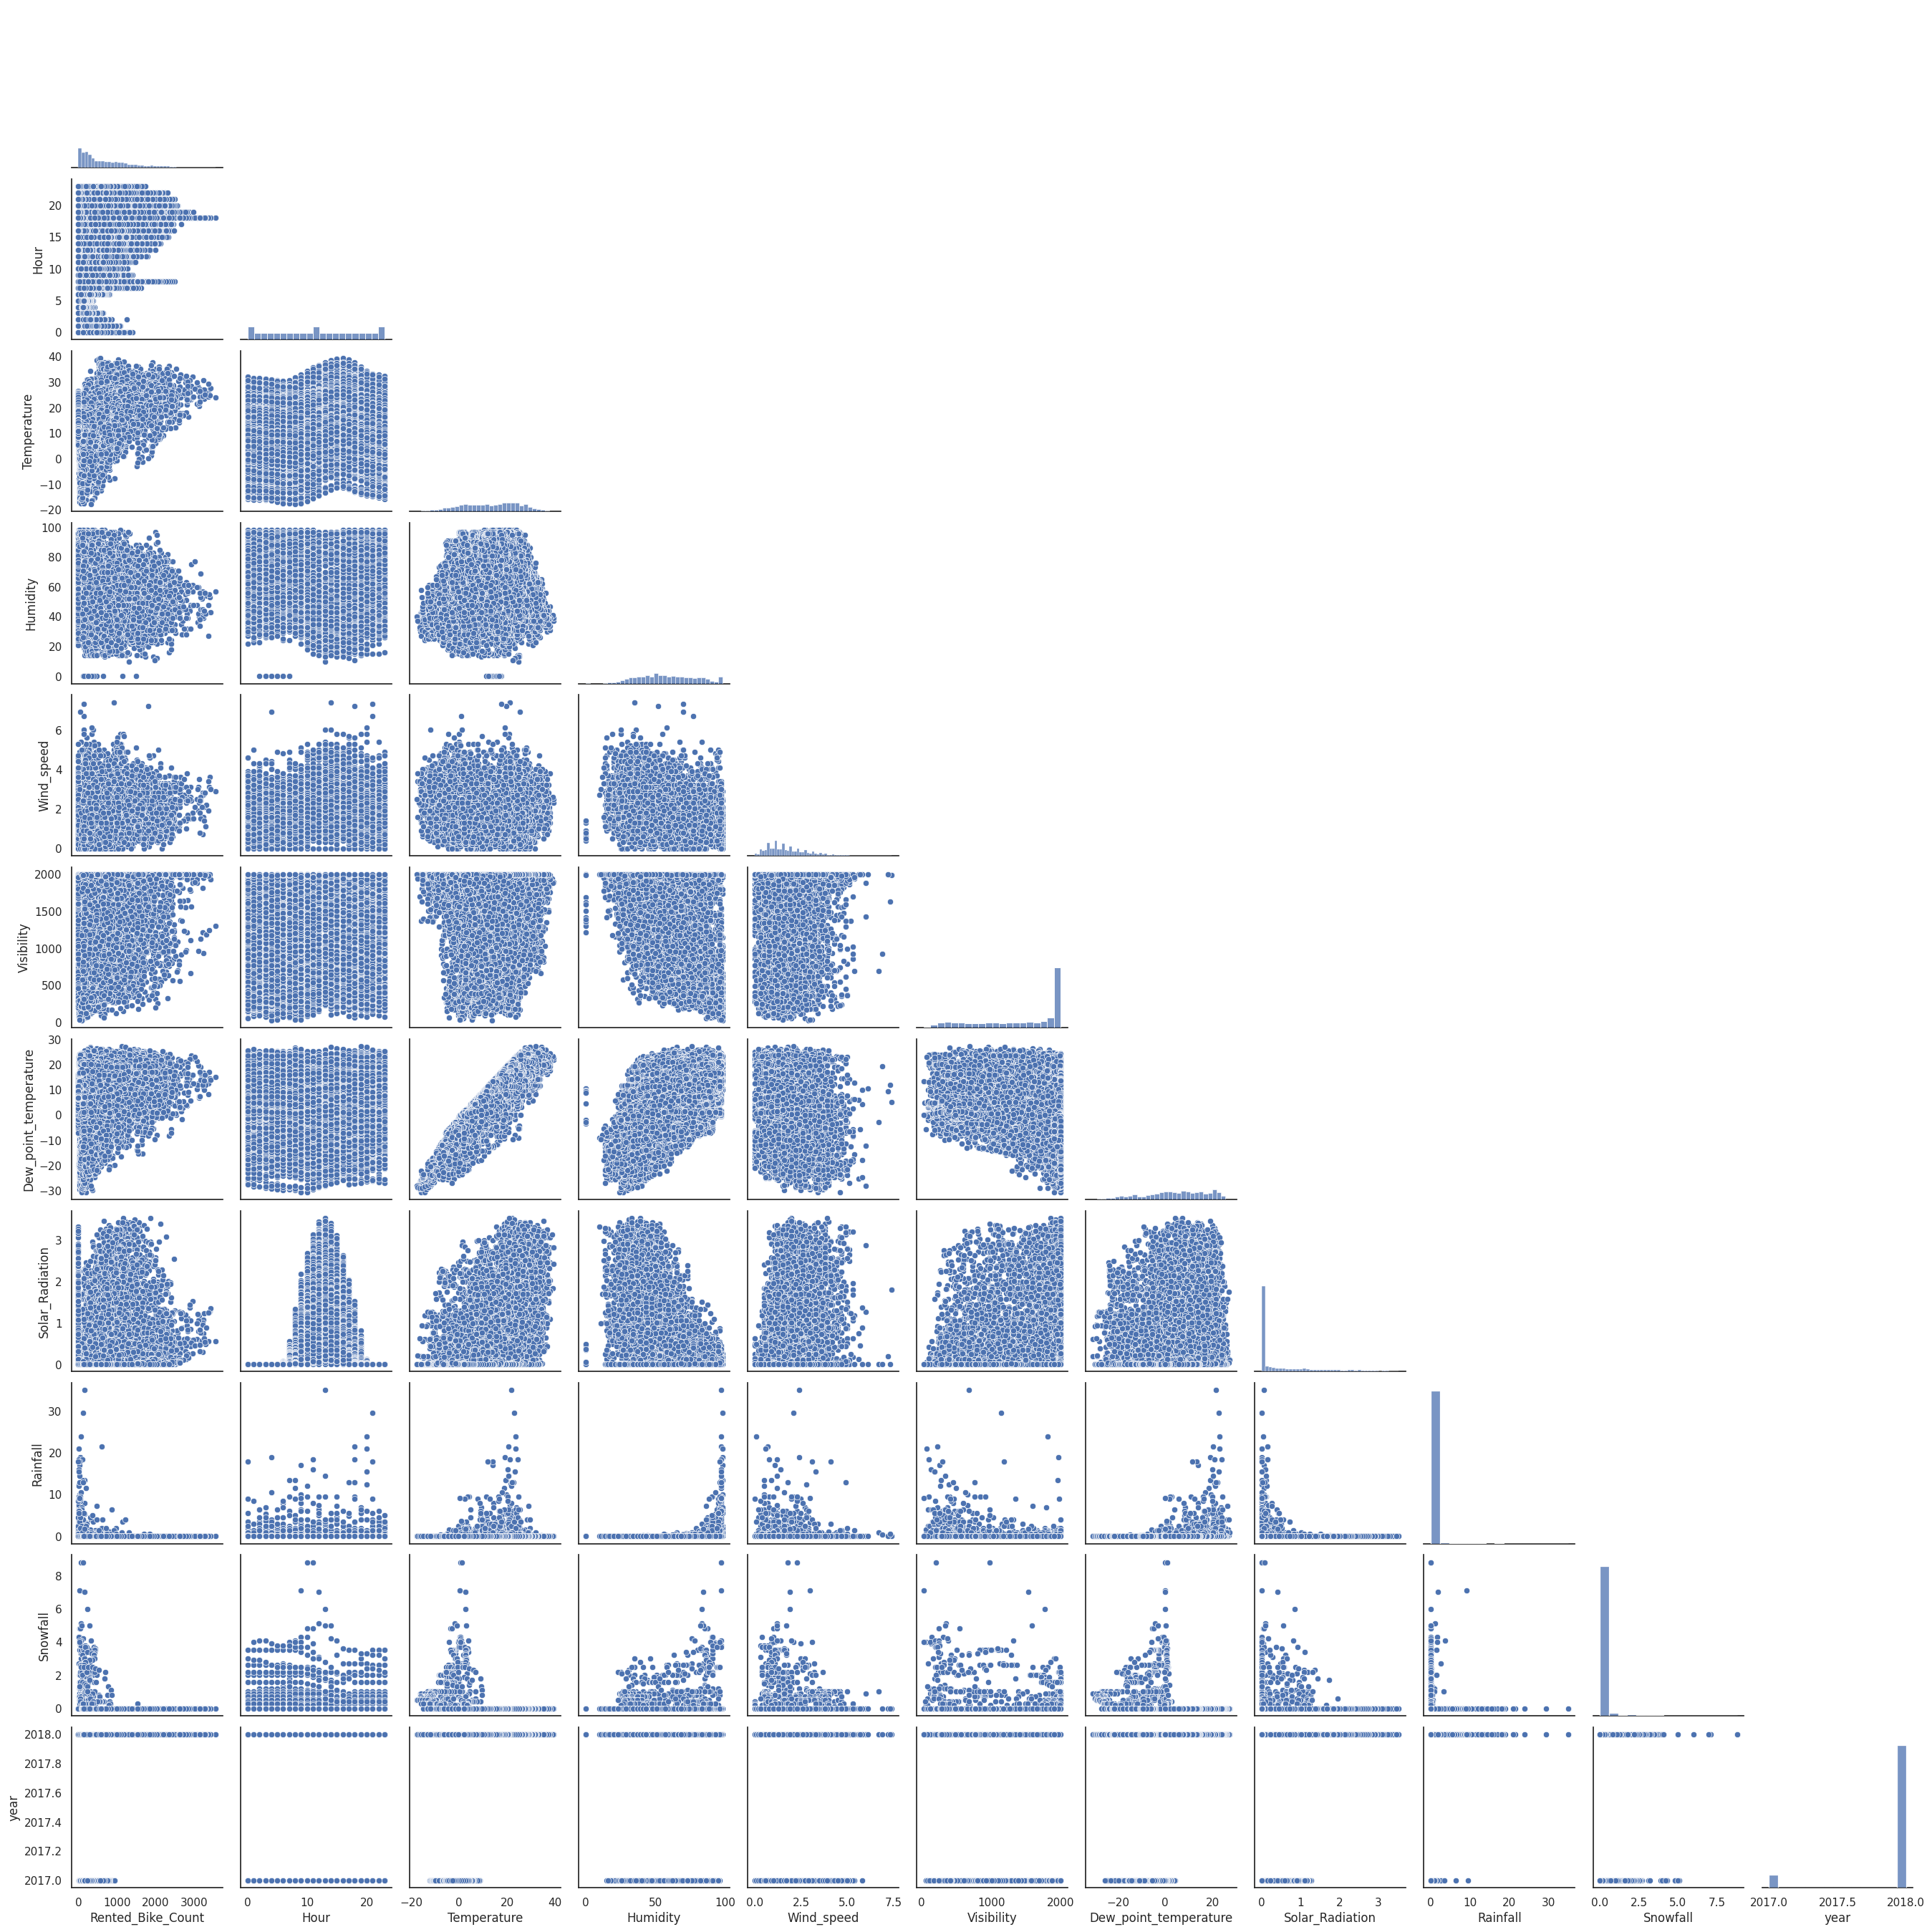

In [45]:
# Pair Plot visualization code

sns.pairplot(df, corner=True)
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The average bike count in Seoul city at any point of time is greater than 100.
2. The average temperature in Seoul city at any point is greater than 10 degree Celsius.
3. The Standard deviation of humidity in Seoul city is 20.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research hypothesis: The average bike count in Seoul city at any point of time is greater than 100.

* Null hypothesis H0: Average = 100.
* Alternate hypothesis Ha: Average > 100.

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value

rented_bike_count_sample = df['Rented_Bike_Count'].sample(500)
rented_bike_count_mean = np.mean(rented_bike_count_sample)
rented_bike_count_std = np.std(rented_bike_count_sample)

In [47]:
# Computing test statistic

ts = (rented_bike_count_mean-100)/(rented_bike_count_std/(np.sqrt(500)))
ts

np.float64(19.454021770059537)

In [48]:
# Calculating the probability
prob_z = norm.cdf(9.3441, 0, 1)
print(prob_z)

1.0


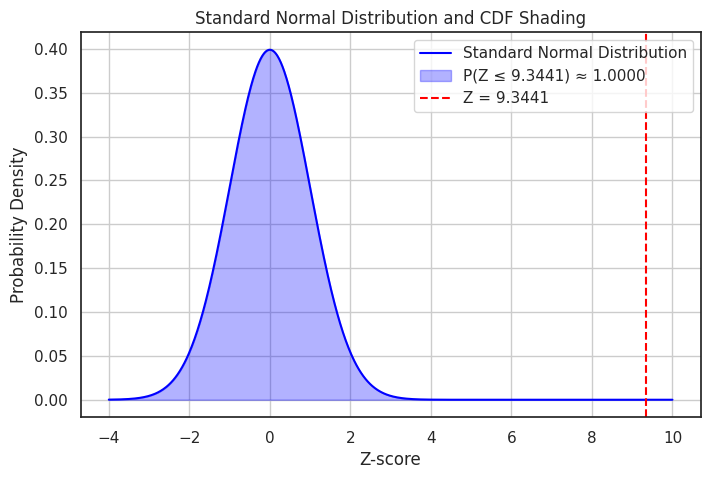

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Defining the standard normal distribution (mean=0, std=1)
x = np.linspace(-4, 10, 1000)
y = norm.pdf(x, 0, 1)

# Compute the cumulative probability P(Z <= 9.3441)
z_score = 9.3441
prob_z = norm.cdf(z_score, 0, 1)

# Plot the normal distribution
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Standard Normal Distribution", color="blue")

# Shading the area under the curve for P(Z <= 9.3441)
x_fill = np.linspace(-4, z_score, 1000)
y_fill = norm.pdf(x_fill, 0, 1)
plt.fill_between(x_fill, y_fill, alpha=0.3, color="blue", label=f"P(Z ≤ {z_score}) ≈ {prob_z:.4f}")

# Marking the Z-score on the plot
plt.axvline(z_score, color="red", linestyle="dashed", label=f"Z = {z_score}")

# Labels and legend
plt.xlabel("Z-score")
plt.ylabel("Probability Density")
plt.title("Standard Normal Distribution and CDF Shading")
plt.legend()
plt.grid()

# Show the plot
plt.show()


In [50]:
# P-Value
p1 = 1-prob_z
p1

np.float64(0.0)

##### Which statistical test have you done to obtain P-Value?

We have chosen Z-test to obtain p-value

##### Why did you choose the specific statistical test?

As we are performing hypothesis testing for mean, we have chosen Z-test to obtain p-value. The probability we have obtained is close to 100%, so we have sufficient evidence to reject H0. Therefore, the average bike count in Seoul city at any point of time is greater than 100.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average temperature in Seoul city at any point is grater than 10 degree Celsius.

* Null hypothesis H0: Average = 10.
* Alternate hypothesis Ha: Average > 10.

#### 2. Perform an appropriate statistical test.

In [51]:
# Perform Statistical Test to obtain P-Value
temp_sample = df['Temperature'].sample(500)
temp_mean = np.mean(temp_sample)
temp_std = np.std(temp_sample)

In [52]:
temp_std

11.956278009481046

In [53]:
 #Computing test statistic

ts2 = (temp_mean-10)/(temp_std/(np.sqrt(500)))
ts2

np.float64(5.198419228232872)

In [54]:
# Calculating the probability
prob_z = norm.cdf(4.90, 0, 1)
print(prob_z)

0.9999995208167234


In [55]:
# P-Value
p1 = 1-prob_z
p1

np.float64(4.791832766137816e-07)

Sample Mean: 14.5250
Sample Standard Deviation: 5.0625
T-Statistic: 19.9866
P-Value: 0.0000
Reject the null hypothesis: The average temperature is significantly greater than 10°C.


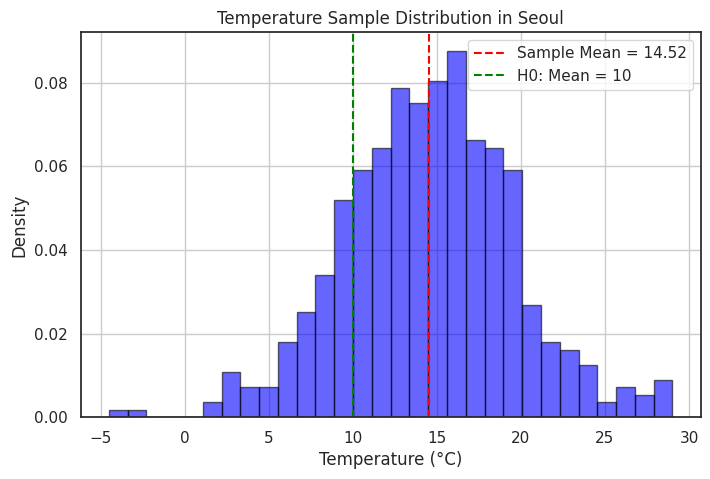

In [56]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


df1 = pd.DataFrame({'Temperature': np.random.normal(15, 5, 10000)})  # Example data with mean 15°C

# Perform Statistical Test to obtain P-Value
temp_sample = df1['Temperature'].sample(500)
temp_mean = np.mean(temp_sample)
temp_std = np.std(temp_sample, ddof=1)  # Using ddof=1 for sample standard deviation

# Hypothesized population mean (H0: Average = 10°C)
pop_mean = 10

# Perform One-Sample One-Tailed T-Test (Ha: Average > 10)
t_stat, p_value = stats.ttest_1samp(temp_sample, pop_mean, alternative='greater')

# Print results
print(f"Sample Mean: {temp_mean:.4f}")
print(f"Sample Standard Deviation: {temp_std:.4f}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The average temperature is significantly greater than 10°C.")
else:
    print("Fail to reject the null hypothesis: Not enough evidence to conclude the average is greater than 10°C.")

# Visualization
plt.figure(figsize=(8, 5))
plt.hist(temp_sample, bins=30, alpha=0.6, color='blue', edgecolor='black', density=True)
plt.axvline(temp_mean, color='red', linestyle='dashed', label=f"Sample Mean = {temp_mean:.2f}")
plt.axvline(pop_mean, color='green', linestyle='dashed', label=f"H0: Mean = {pop_mean}")
plt.xlabel("Temperature (°C)")
plt.ylabel("Density")
plt.title("Temperature Sample Distribution in Seoul")
plt.legend()
plt.grid()
plt.show()


##### Which statistical test have you done to obtain P-Value?

We have chosen Z-test to obtain p-value.

##### Why did you choose the specific statistical test?

As we are performing hypothesis testing for mean, we have chosen Z-test to obtain p-value. The probability we have obtained is 99%, so we have sufficient evidence to reject H0. Therefore, the average temperature in Seoul city at any point of time is greater than 10 degrees.


### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The Standard deviation of humidity in Seoul city is 20.

* Null hypothesis H0: Standard deviation != 20.
* Alternate hypothesis Ha: Standard deviation = 20.

#### 2. Perform an appropriate statistical test.

In [57]:
# Perform Statistical Test to obtain P-Value

humid_sample = df['Humidity'].sample(500)
S2 = (np.std(humid_sample))**2

In [58]:
# Computing test statistic

ts3 = (49 * S2)/(20*20)
ts3

50.27312730999999

In [59]:
# Calculating the probability
prob = chi2.cdf(53.55,49)
print(prob)

0.6960317386207685


In [60]:
# P-Value
p1 = 1-prob
p1

np.float64(0.3039682613792315)

In [61]:
import numpy as np
import pandas as pd
import scipy.stats as stats


df.columns = df.columns.str.strip()  # Clean column names

# Check if 'Humidity' column exists
if 'Humidity' in df.columns:
    # Sample 500 humidity values
    humid_sample = df['Humidity'].sample(500)

    # Compute sample variance
    S2 = np.var(humid_sample, ddof=1)  # Sample variance (ddof=1 for unbiased estimate)
    n = len(humid_sample)  # Sample size

    # Hypothesized population standard deviation
    sigma_0 = 20  # Given in hypothesis
    sigma_0_sq = sigma_0 ** 2  # Convert to variance

    # Compute Chi-Square test statistic
    ts3 = (n - 1) * S2 / sigma_0_sq

    # Compute probability (CDF of chi-square distribution)
    prob = stats.chi2.cdf(ts3, df=n-1)

    # Compute two-tailed p-value
    p_value = 2 * min(prob, 1 - prob)

    # Print results
    print(f"Sample Variance: {S2:.4f}")
    print(f"Chi-Square Statistic: {ts3:.4f}")
    print(f"Probability (Chi-Square CDF): {prob:.4f}")
    print(f"P-Value: {p_value:.4f}")

    # Decision based on significance level
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: The standard deviation is equal to 20.")
    else:
        print("Fail to reject the null hypothesis: No significant evidence that the standard deviation is equal to 20.")
else:
    print("Column 'Humidity' not found in the dataset.")


Sample Variance: 376.3114
Chi-Square Statistic: 469.4484
Probability (Chi-Square CDF): 0.1753
P-Value: 0.3506
Fail to reject the null hypothesis: No significant evidence that the standard deviation is equal to 20.


##### Which statistical test have you done to obtain P-Value?

We have chosen Chi2-test to obtain p-value.

##### Why did you choose the specific statistical test?

As we are performing hypothesis testing for standard deviation, we have chosen Chi2-test to obtain p-value. The probability we have obtained is 69% and p value is 0.30 which is significantly high so we are fail to reject H0. Therefore, the standard deviation of humidity is not always equal to 20.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There are no missing values.

### 2. Handling Outliers

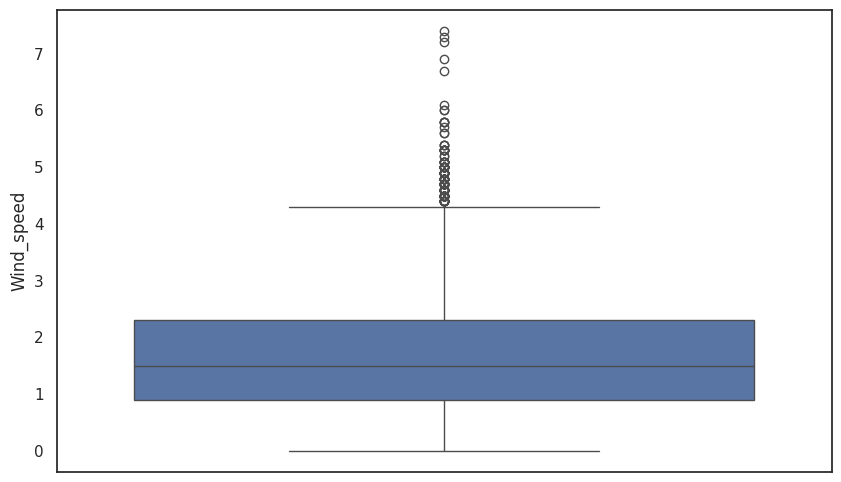

In [62]:
# Handling Outliers & Outlier treatments

sns.boxplot(df['Wind_speed'])
plt.show()

In [63]:
# Finding the IQR
percentile25 = df['Wind_speed'].quantile(0.25)
percentile75 = df['Wind_speed'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [64]:
# Capping
df['Wind_speed'] = np.where(
    df['Wind_speed'] > upper_limit,
    upper_limit,
    np.where(
        df['Wind_speed'] < lower_limit,
        lower_limit,
        df['Wind_speed']
    )
)

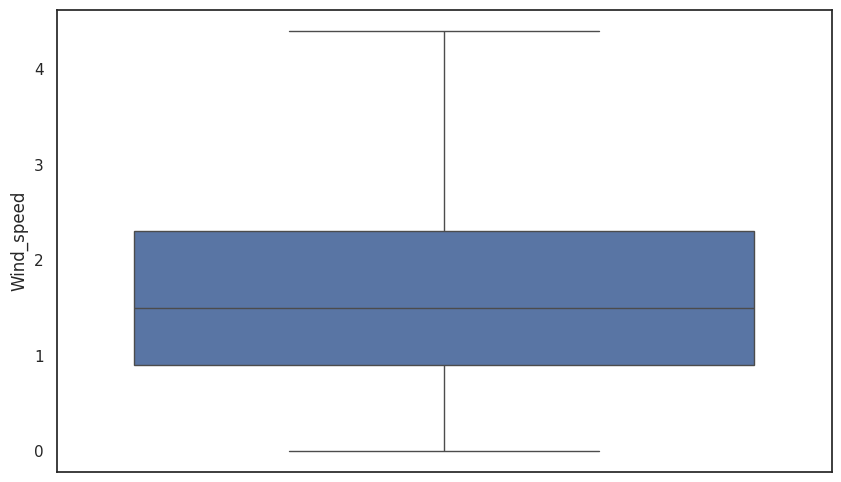

In [65]:
# Checking for outliers
sns.boxplot(df['Wind_speed'])
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used 'Capping' method to treat outliers. As there are only 8760 entries in my dataset, trimming the outliers would lead to data loss.

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

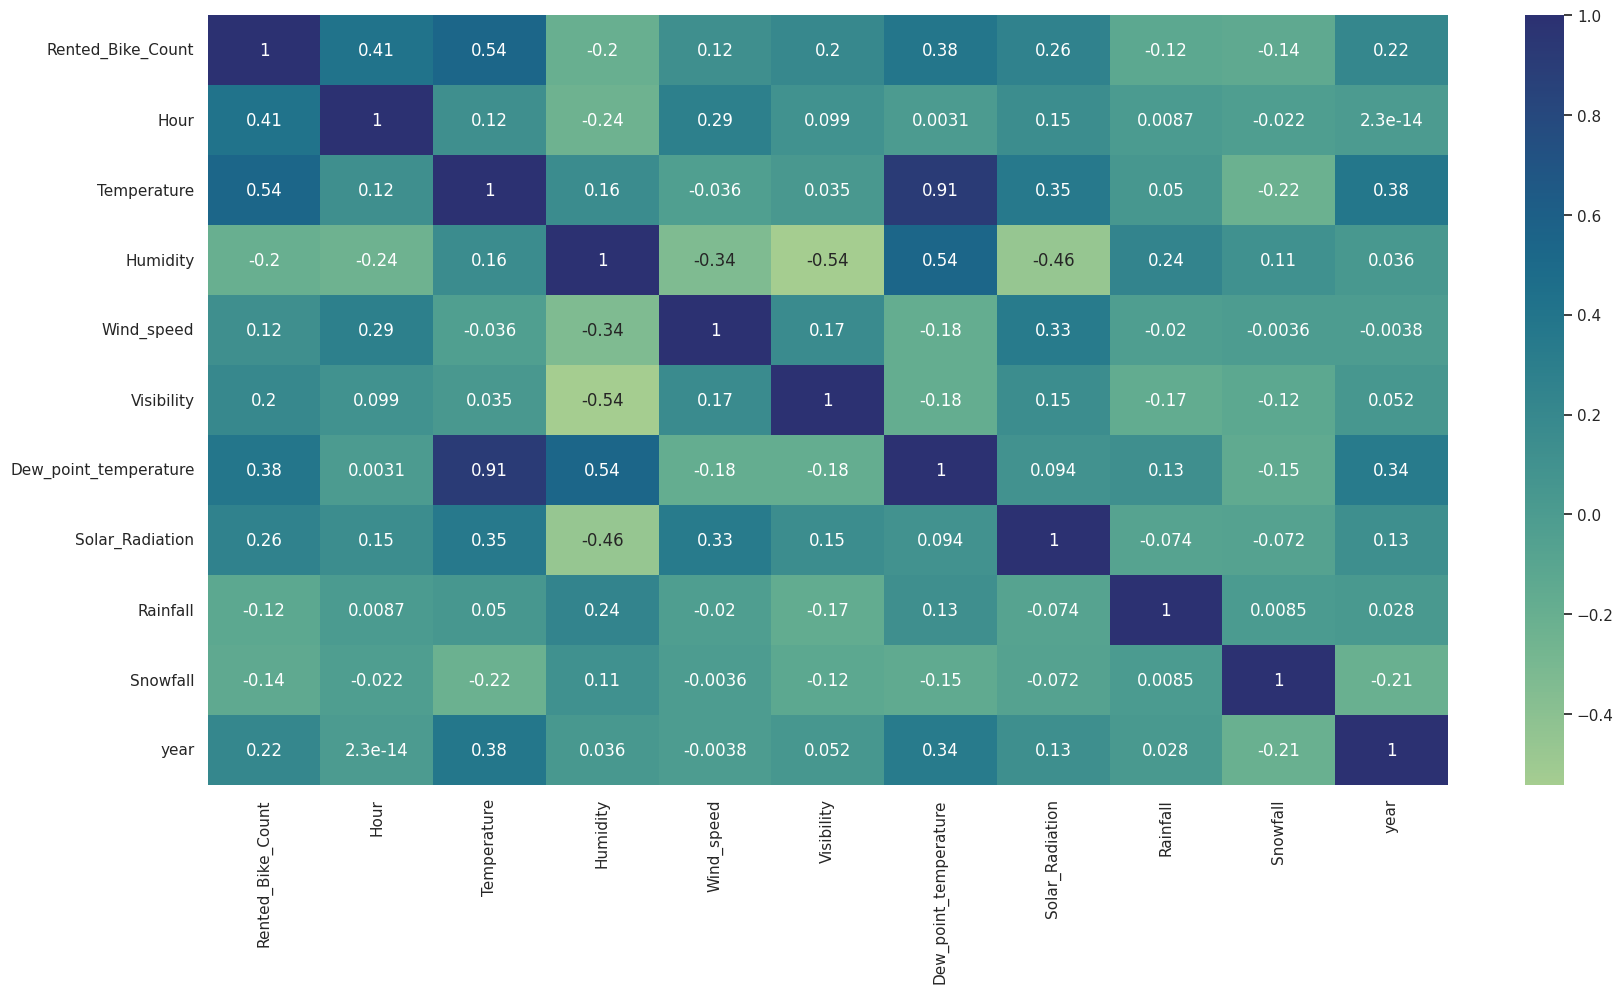

In [66]:
# Manipulate Features to minimize feature correlation and create new features
plt.figure(figsize=(20,10))
sns.heatmap(dfc.corr(),annot=True,cmap='crest')
plt.show()

As we can see there is multicollinearity between the columns 'Temperature' & 'Dew_point_temperature'. Hence we can drop the column 'Dew_point_temperature'.

In [67]:
df.drop('Dew_point_temperature',axis=1,inplace=True)

### 4. Categorical Encoding

In [68]:
# Encode your categorical columns
# Using Pandas get Dummies for Encoding categorical features
df=pd.get_dummies(df,drop_first=True,sparse=True)
df.columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'year_2018'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used One hot encoding, and also dropping the first column of each encoded column. This method is an effective technique used to represent categorical variables as numerical values for a machine learning model.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

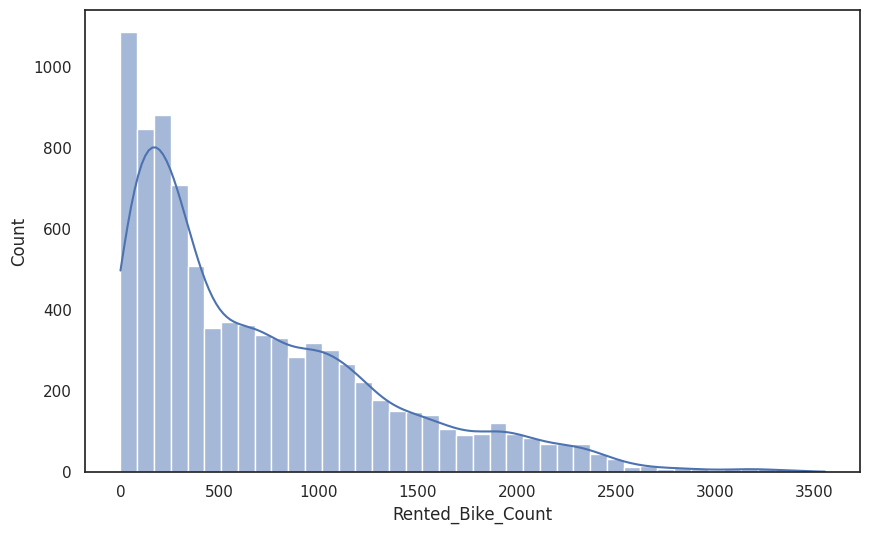

In [69]:
# Transform Your data
# Transform Your data
sns.histplot(df['Rented_Bike_Count'],kde=True)
plt.show()

In [70]:
df['Rented_Bike_Count']=np.sqrt(df['Rented_Bike_Count'])

In [71]:
df['Rented_Bike_Count'].head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

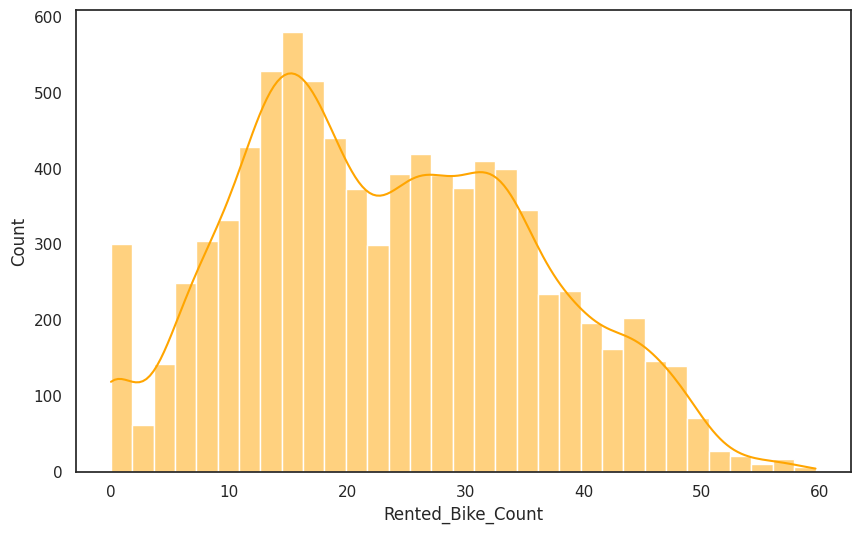

In [72]:
sns.histplot(df['Rented_Bike_Count'],kde=True,color='orange')
plt.show()

The rented_bike_count column was right skewed. I have to square root transformation as it provides the best normal distribution compared to the log/square tranformations.

### 6. Data Splitting

In [73]:
# Split your data to train and test.

X = df.drop(columns=['Rented_Bike_Count'],axis=1)
y = df['Rented_Bike_Count']

In [74]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=2)

In [75]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7008, 53), (1752, 53), (7008,), (1752,))

I have used 80-20 split ratio. This optimal ratio provides enough data for the model to train and test.


### 7. Data Scaling

In [76]:
# Scaling the data


scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

I have used min max scaler. As the dataset had values ranging from -30 & 3000, a scaling method had to be used for optimal model performance.



## ***7. ML Model Implementation***

### ML Model - 1  Linear Regression


In [77]:
# ML Model - 1 Implementation
lr = LinearRegression()

# Fit the Algorithm
lr.fit(X_train, y_train)

# Predict on the model
y_pred = lr.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [78]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error(y_test, y_pred)
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error(y_test, y_pred)
print('MAE :', MAE)

# R2
R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)


MSE : 32.67817162833048
RMSE : 5.716482452376678
MAE : 4.354584691887349
R2 : 0.7892180840409075
Adjusted R2 : 0.7826389076299347


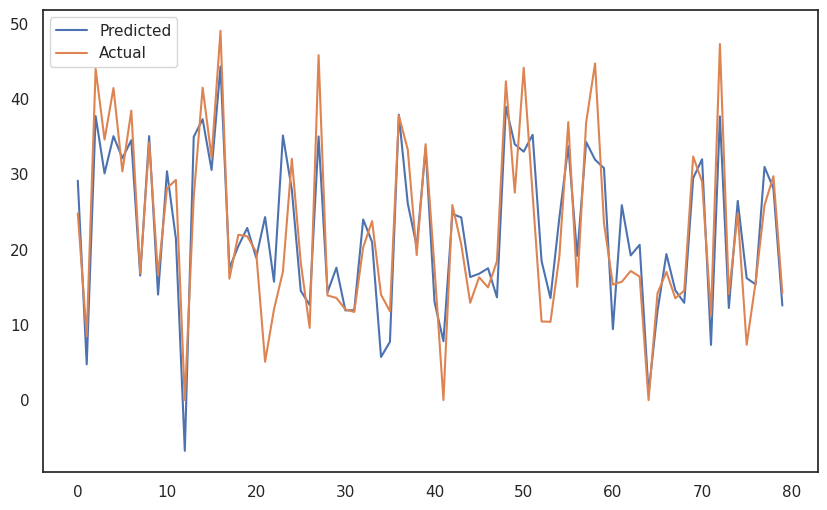

In [79]:
# Visualizing evaluation Metric Score chart

plt.plot((y_pred)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicted","Actual"])
plt.show()

### ML Model - 2 Ridge Regression

In [80]:
#ML Model - 2 Implementation
ridge = Ridge()

# Fit the Algorithm
ridge.fit(X_train,y_train)

# Predict on the model
y_pred_ridge = ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [81]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 32.677340365279036
RMSE : 5.716409744348199
MAE : 4.355332163833339
R2 : 0.7892234458836888
Adjusted R2 : 0.782644436832944


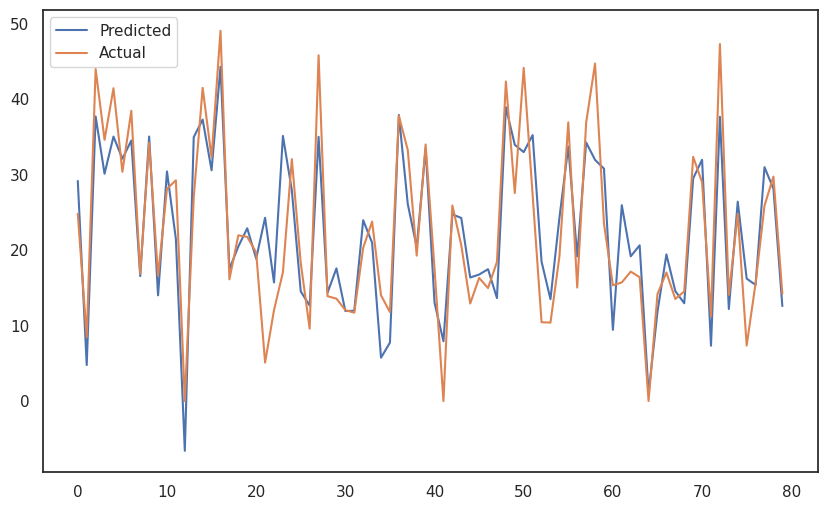

In [82]:
# Visualizing evaluation Metric Score chart

plt.plot((y_pred_ridge)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [83]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge_gcv = GridSearchCV(ridge, parameters, scoring='r2', cv=5)

# Fit the Algorithm
ridge_gcv.fit(X_train, y_train)

# Predict on the model
y_pred_ridge_gcv = ridge_gcv.predict(X_test)

##### Which hyperparameter optimization technique have you used and why?

I have used Grid search CV as hyperparameter optimization technique. It finds the optimal aplha value for which the model is able to perform better

In [84]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_ridge_gcv))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_ridge_gcv))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_ridge_gcv))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_ridge_gcv))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 32.677340365279036
RMSE : 5.716409744348199
MAE : 4.355332163833339
R2 : 0.7892234458836888
Adjusted R2 : 0.782644436832944


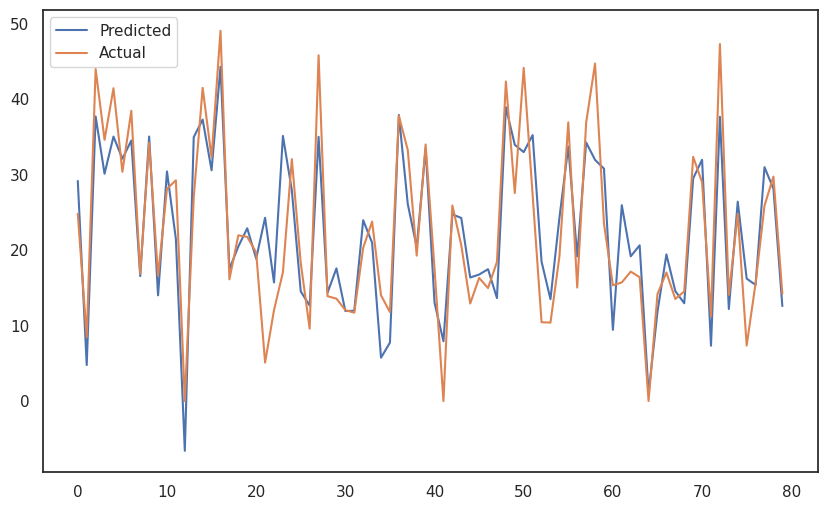

In [85]:
# Visualizing evaluation Metric Score chart

plt.plot((y_pred_ridge_gcv)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicted","Actual"])
plt.show()

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart

No significant imporovement seen.

### ML Model - 3 Lasso Regression

In [86]:
# ML Model - 3 Implementation
lasso = Lasso()

# Fit the Algorithm
lasso.fit(X_train,y_train)

# Predict on the model
y_pred_lasso = lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [87]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 92.83497005793201
RMSE : 9.635090557848017
MAE : 7.267185311997752
R2 : 0.4011925428578328
Adjusted R2 : 0.38250185073266507


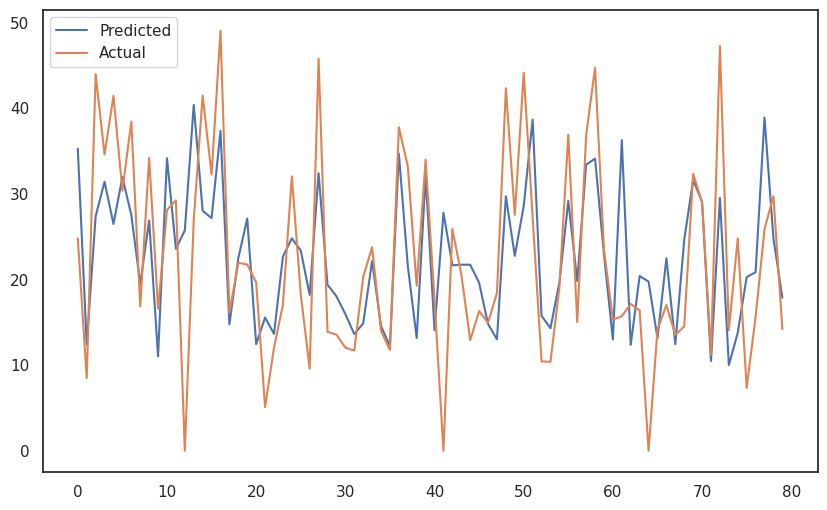

In [88]:
# Visualizing evaluation Metric Score chart
plt.plot((y_pred_lasso)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [89]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
lasso_gcv = GridSearchCV(lasso, parameters, scoring='r2', cv=5)

# Fit the Algorithm
lasso_gcv.fit(X_train, y_train)

# Predict on the model
y_pred_lasso_gcv = lasso_gcv.predict(X_test)

##### Which hyperparameter optimization technique have you used and why?

I have used Grid search CV as hyperparameter optimization technique. It finds the optimal aplha value for which the model is able to perform better.





In [90]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_lasso_gcv))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_lasso_gcv))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_lasso_gcv))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_lasso_gcv))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 32.67608920624398
RMSE : 5.716300307562924
MAE : 4.354372136952269
R2 : 0.7892315161546201
Adjusted R2 : 0.7826527590027914


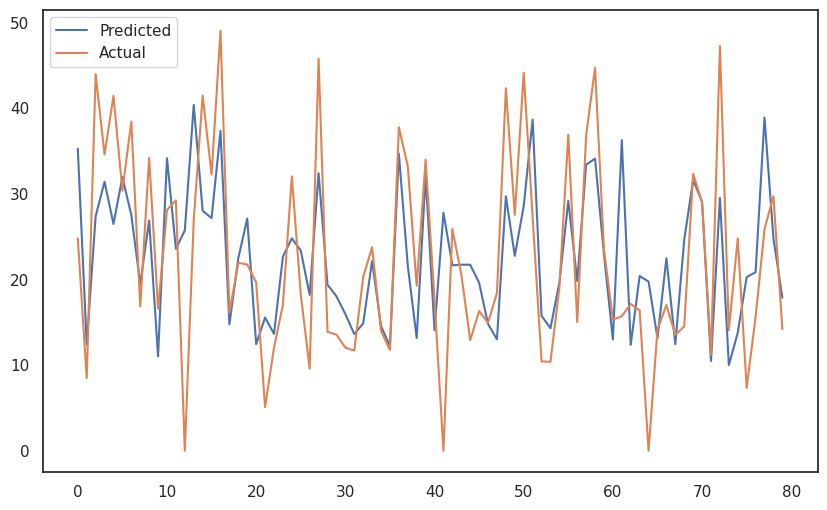

In [91]:
# Visualizing evaluation Metric Score chart
plt.plot((y_pred_lasso)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicted","Actual"])
plt.show()

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No significant improvement seen, the model performance decreased compared to Linear regression and Ridge regression.

### ML Model - 4 Random Forest Regression

In [92]:
# ML Model - 4 Implementation
rf_model = RandomForestRegressor()

# Fit the Algorithm
rf_model.fit(X_train, y_train)

# Predict on the model
y_pred_rf = rf_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [93]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 10.221206632161353
RMSE : 3.197062187721933
MAE : 2.1287175330497905
R2 : 0.9340708059849668
Adjusted R2 : 0.9320129453943916


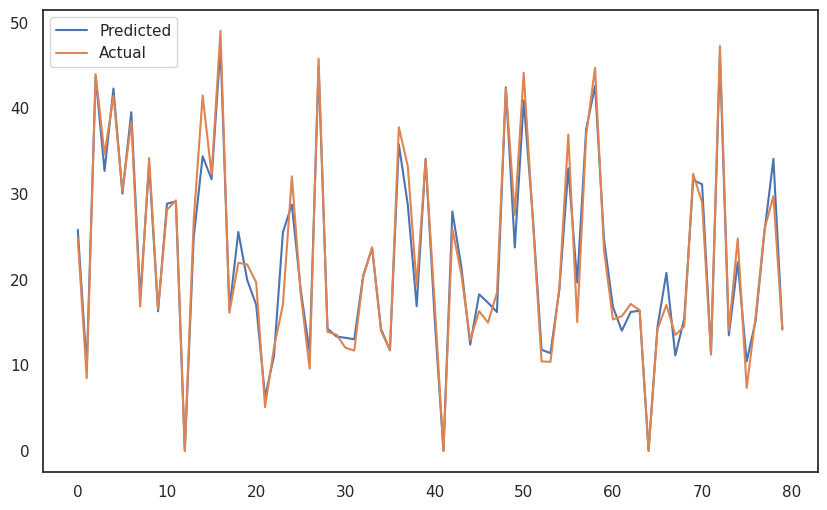

In [94]:
# Visualizing evaluation Metric Score chart
plt.plot((y_pred_rf)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [95]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'n_estimators':[5, 10, 15, 20, 30],
              'max_depth' : [3, 5, 10, 15, 20],
              'max_features':['auto','sqrt','log2']
              }
Random_forest_Grid_search = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1,cv=3)

# Fit the Algorithm
Random_forest_Grid_search.fit(X_train, y_train)

# Predict on the model
y_pred_rf_gcv = Random_forest_Grid_search.predict(X_test)

Which hyperparameter optimization technique have you used and why?

I have used Grid search CV as hyperparameter optimization technique. It finds the optimal aplha value for which the model is able to perform better


In [96]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_rf_gcv))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_rf_gcv))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_rf_gcv))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_rf_gcv))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 15.995469362353532
RMSE : 3.9994336301973474
MAE : 2.960583027583868
R2 : 0.8968254491956075
Adjusted R2 : 0.8936050421328084


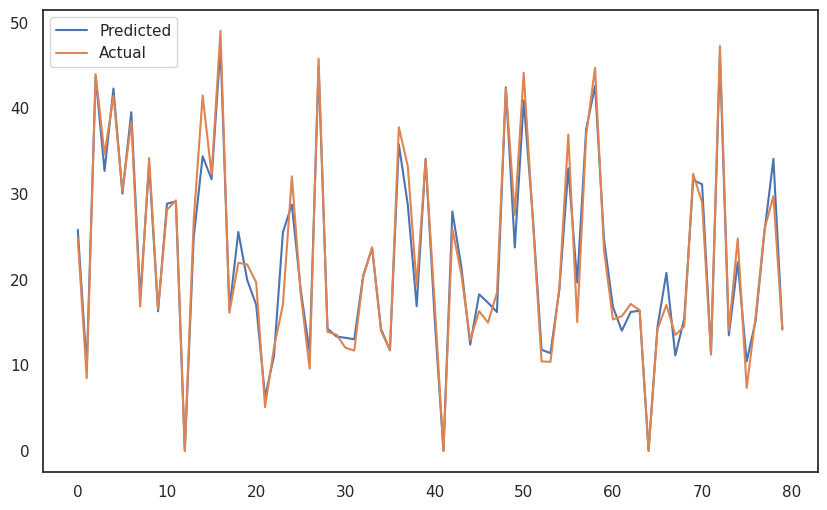

In [97]:
# Visualizing evaluation Metric Score chart
plt.plot((y_pred_rf)[:80])
plt.plot((np.array(y_test)[:80]))
plt.legend(["Predicted","Actual"])
plt.show()

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Major improvements compared to linear models.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have chosen Adjusted R2 score as it is best able to explain the variance in the data. The adjusted R2 score also adjusts for predictors that are not significant in a regression model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have chosen Random Forest Regressor as my final prediction model. With an adjusted r2 score of 91%, we can consider random forest regressor as our best model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [100]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

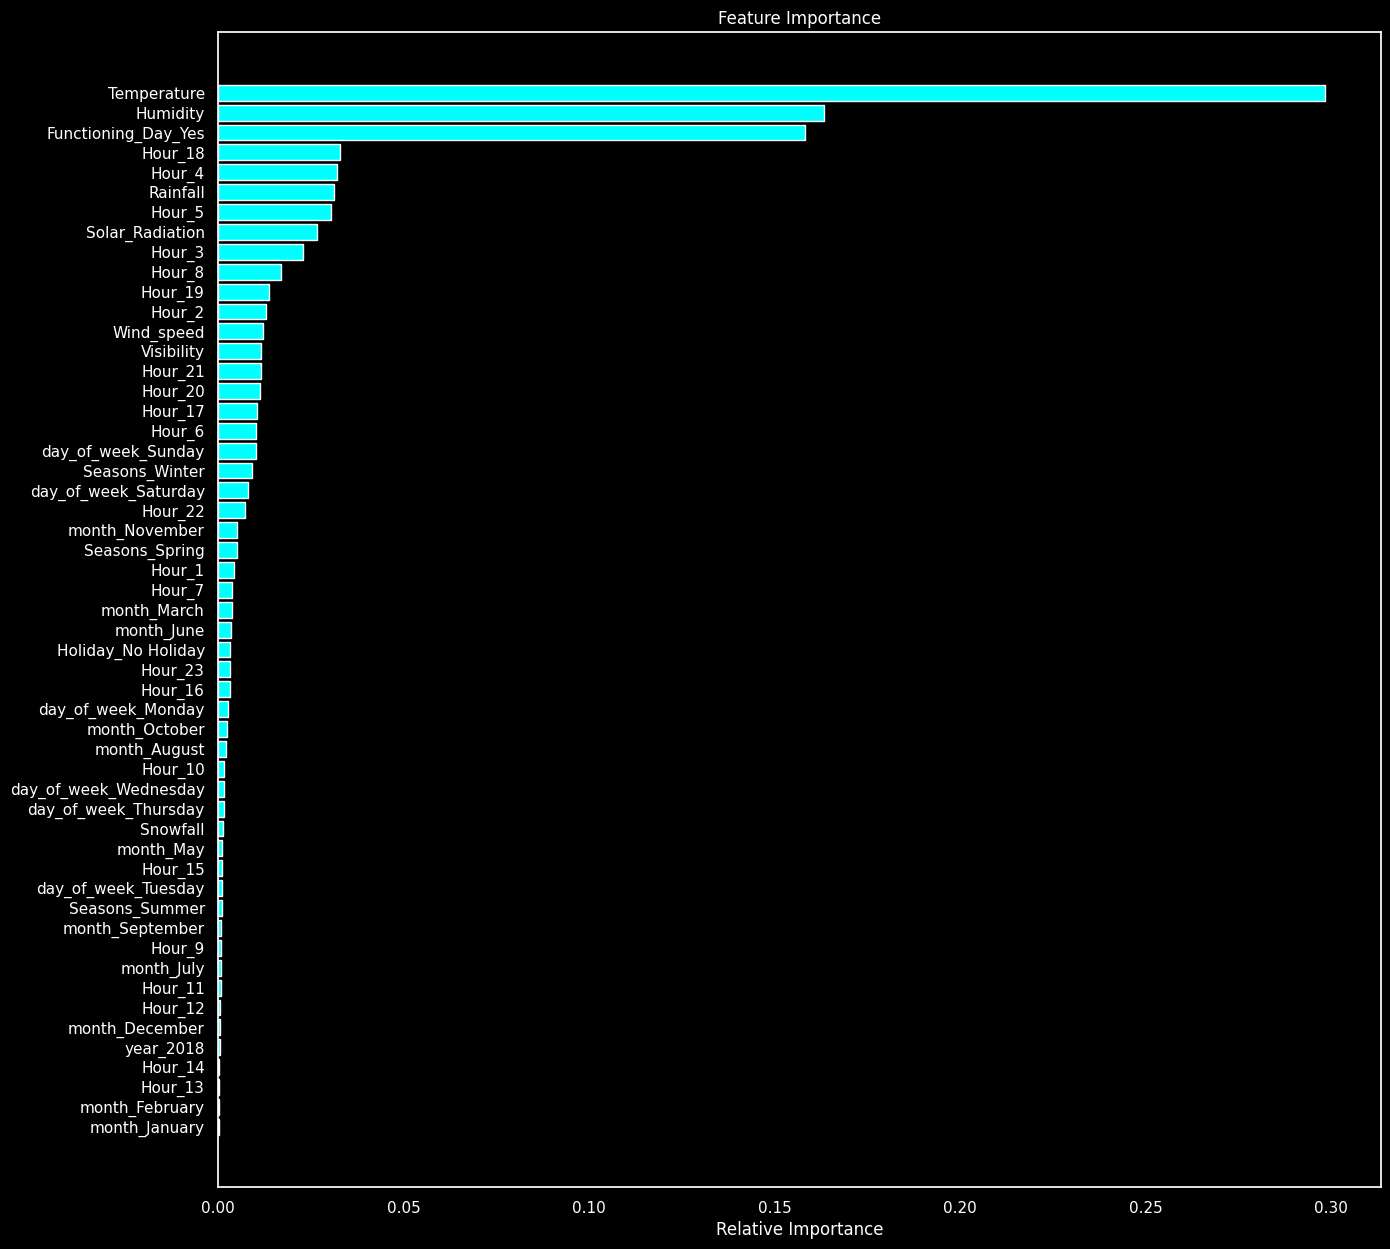

In [101]:
#Plotting figure
plt.figure(figsize=(15,15))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

As we can see from the feature importance graph, the feature 'temperature' can be considered as most important with relative importance of 0.30. The next 2 features are humidity and functioning_day_yes can be considered with relative importance of 0.17. As these 3 main features play a role in decreasing the value of entropy, the machine learning model, random forest regressor considers them closer to the root node.



# **Conclusion**

In our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable i.e, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class. We also analysed numerical variable, check out the correlation, distribution and their relationship with the dependent variable. We then later hot encoded the categorical variables.

Next we implemented 4 machine learning algorithms Linear Regression,Ridge(L2), Lasso(L1), Random Forest Regressor. We did some hyperparameter tuning to improve our model performance.







*   Out of all above models Random forest Regressor gives the highest R2 score of 91% for test Set.
*   No overfitting is seen.

**So the bike rental company can deploy a machine learning model that uses Random Forest Regressor to predict the demand for city bikes for a particular hour, which can help the company meet the demand accurately. On the contrary when the company predicts to be a low demand day/season, the bikes can be sent to maintainance.**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***